In [142]:
import pandas as pd
import numpy as np


In [143]:
data = pd.read_csv('data.csv',sep=',',error_bad_lines=False)

C:\Users\sush1\Anaconda3\envs\passwordstrength\lib\site-packages\IPython\core\interactiveshell.py:3441: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 2810: expected 2 fields, saw 5\nSkipping line 4641: expected 2 fields, saw 5\nSkipping line 7171: expected 2 fields, saw 5\nSkipping line 11220: expected 2 fields, saw 5\nSkipping line 13809: expected 2 fields, saw 5\nSkipping line 14132: expected 2 fields, saw 5\nSkipping line 14293: expected 2 fields, saw 5\nSkipping line 14865: expected 2 fields, saw 5\nSkipping line 17419: expected 2 fields, saw 5\nSkipping line 22801: expected 2 fields, saw 5\nSkipping line 25001: expected 2 fields, saw 5\nSkipping line 26603: expected 2 fields, saw 5\nSkipping line 26742: expected 2 fields, saw 5\nSkipping line 29702: expected 2 fields, saw 5\nSkipping line 32767: expected 2 fields, saw 5\nSkipping line 32878: expected 2 f

b'Skipping line 525174: expected 2 fields, saw 5\nSkipping line 526251: expected 2 fields, saw 5\nSkipping line 529611: expected 2 fields, saw 5\nSkipping line 531398: expected 2 fields, saw 5\nSkipping line 534146: expected 2 fields, saw 5\nSkipping line 544954: expected 2 fields, saw 5\nSkipping line 553002: expected 2 fields, saw 5\nSkipping line 553883: expected 2 fields, saw 5\nSkipping line 553887: expected 2 fields, saw 5\nSkipping line 553915: expected 2 fields, saw 5\nSkipping line 554172: expected 2 fields, saw 5\nSkipping line 563534: expected 2 fields, saw 5\nSkipping line 565191: expected 2 fields, saw 5\nSkipping line 574108: expected 2 fields, saw 5\nSkipping line 574412: expected 2 fields, saw 5\nSkipping line 575985: expected 2 fields, saw 5\nSkipping line 580091: expected 2 fields, saw 5\nSkipping line 582682: expected 2 fields, saw 5\nSkipping line 585885: expected 2 fields, saw 5\nSkipping line 590171: expected 2 fields, saw 5\nSkipping line 591924: expected 2 field

In [144]:
data.head()

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1


In [145]:
data.isnull().sum()

password    1
strength    0
dtype: int64

In [146]:
data.dropna(inplace=True)

C:\Users\sush1\Anaconda3\envs\passwordstrength\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='strength', ylabel='count'>

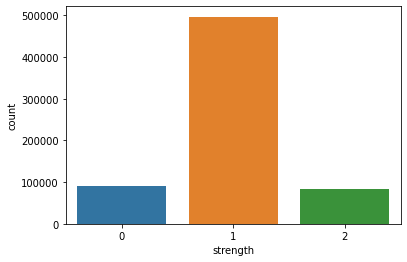

In [147]:
import seaborn as sns
sns.countplot(data['strength'])

#### This is imbalanced dataset

In [148]:
X= [x for x in data['password']]
Y=[y for y in data['strength']]


In [149]:
print(len(X),len(Y))
print(type(X),type(Y))

669639 669639
<class 'list'> <class 'list'>


In [150]:
print(len(X), len(Y))

669639 669639


In [151]:
## Divide the dataset into train, test plit
from sklearn.model_selection import train_test_split

xtrain,xtest, ytrain,ytest=train_test_split(X,Y, random_state=10, test_size=0.25)
print(len(xtrain),len(xtest),len(ytrain),len(ytest))

502229 167410 502229 167410


In [152]:
#Vectorize the character of the all password.
#Pasword strength is judged by the placement and uses of the character, 
#Here we will vecotorize the each character inttead of the word

#Fetch each character of the password and store into the list

def charcters_ofthe_password(pwds):
    pass_char=[]
    for char in pwds:
        pass_char.append(char)
        
    return pass_char

# X_char_list=charcters_ofthe_password(X)


In [153]:
from sklearn.feature_extraction.text import TfidfVectorizer
vector = TfidfVectorizer(tokenizer=charcters_ofthe_password)
xtrain_tfidf = vector.fit_transform(xtrain)
xtest_tfidf= vector.transform(xtest)

In [154]:
print(xtrain_tfidf.shape)
print(xtest_tfidf.shape)

(502229, 149)
(167410, 149)


In [155]:
vector.vocabulary_

{'t': 74,
 'o': 69,
 'y': 79,
 's': 73,
 'd': 58,
 'a': 55,
 '8': 41,
 '3': 36,
 '1': 34,
 '0': 33,
 'w': 77,
 'r': 72,
 'k': 65,
 'z': 80,
 'i': 63,
 'm': 67,
 'q': 71,
 'p': 70,
 'h': 62,
 '2': 35,
 'n': 68,
 'e': 59,
 '9': 42,
 '4': 37,
 '7': 40,
 '6': 39,
 'c': 57,
 '5': 38,
 'g': 61,
 'x': 78,
 'l': 66,
 'u': 75,
 'j': 64,
 'f': 60,
 'v': 76,
 'b': 56,
 ';': 43,
 '.': 31,
 '_': 53,
 '!': 20,
 '@': 48,
 '&': 25,
 '#': 22,
 '-': 30,
 '~': 84,
 ' ': 19,
 '/': 32,
 '*': 28,
 '+': 29,
 '$': 23,
 '?': 47,
 '^': 52,
 '(': 26,
 ')': 27,
 '[': 49,
 ']': 51,
 '%': 24,
 '=': 45,
 '<': 44,
 '÷': 132,
 'ä': 115,
 '±': 97,
 'º': 105,
 '>': 46,
 'ó': 128,
 'å': 116,
 'ÿ': 139,
 '³': 99,
 '°': 96,
 'â': 114,
 'ú': 134,
 'þ': 138,
 '\x04': 1,
 '\x0e': 5,
 '|': 82,
 'õ': 130,
 '\\': 50,
 '}': 83,
 '{': 81,
 '\x05': 2,
 '\x10': 7,
 '—': 142,
 '"': 21,
 'µ': 101,
 '·': 103,
 'é': 120,
 'á': 113,
 '\x17': 12,
 '§': 93,
 'ç': 118,
 'í': 122,
 'ð': 125,
 'ß': 111,
 '¿': 109,
 '\xa0': 88,
 '\x1c': 16,
 '

In [156]:
print(xtrain_tfidf[0])
print('*********************')
print(xtest_tfidf[0])


  (0, 41)	0.6758689728728422
  (0, 55)	0.2216684539513668
  (0, 58)	0.33484967581631586
  (0, 73)	0.3021468788679618
  (0, 79)	0.3429032236919394
  (0, 69)	0.2731159447474058
  (0, 74)	0.31380287782792093
*********************
  (0, 73)	0.2548313935341691
  (0, 72)	0.2482085257152299
  (0, 69)	0.2303466349119466
  (0, 63)	0.22622054342459227
  (0, 61)	0.5932594292172844
  (0, 60)	0.34201878209828396
  (0, 59)	0.2192761983891946
  (0, 57)	0.2925366845869247
  (0, 41)	0.28501474655139425
  (0, 40)	0.2922180961628415


In [157]:
type(xtrain_tfidf)


scipy.sparse.csr.csr_matrix

In [158]:
xtrain_tfidf[0].shape

(1, 149)

In [159]:
feature_name = vector.get_feature_names_out()

#get tfidf vector for first document
first_doc=xtrain_tfidf[0]
first_vect=pd.DataFrame(first_doc.T.todense(), index=feature_name, columns=['tfidf'])
first_vect.sort_values(by='tfidf', ascending=False)


,tfidf
8,0.675869
y,0.342903
d,0.334850
t,0.313803
s,0.302147
...,...
[,0.000000
\,0.000000
],0.000000
^,0.000000


In [160]:
#!pip install imbalanced-learn

In [161]:
from sklearn.linear_model import LogisticRegression

lgr = LogisticRegression(multi_class='ovr',max_iter=2000)
lgr.fit(xtrain_tfidf,ytrain)

LogisticRegression(max_iter=2000, multi_class='ovr')

In [162]:
ytrain_pred= lgr.predict(xtrain_tfidf)
print(lgr.score(xtrain_tfidf,ytrain))

0.8121653667948286


In [163]:
ytest_pred=lgr.predict(xtest_tfidf)
print(lgr.score(xtest_tfidf,ytest))

0.8111283674810346


In [164]:
lgr_mult = LogisticRegression(multi_class='multinomial',max_iter=2000)
lgr_mult.fit(xtrain_tfidf,ytrain)

LogisticRegression(max_iter=2000, multi_class='multinomial')

In [165]:
print(lgr_mult.score(xtest_tfidf,ytest))

0.8182784779881728


In [166]:
input_test=input("Enter Password to test the stregnthness.")
if input_test=='':
    input_test='abcedefgh'
input_password=np.array([input_test])
feed_pwd= vector.transform(input_password)
pred = lgr_mult.predict(feed_pwd)
print(pred)

Enter Password to test the stregnthness.ghh
[0]


##### XGBoost Algorith

In [167]:
from xgboost import XGBClassifier

In [168]:
#!pip install hyperopt

In [169]:
from hyperopt import hp

space={'max_depth':hp.quniform("max_depth", 3, 18,2),
       'gamma': hp.uniform('gamma',1,9),
       'reg_alpha': hp.quniform('reg_alpha', 40, 180,1),
       'reg_lambda': hp.uniform('reg_lambda',0,1),
       'colsample_bytree': hp.uniform('colsample_bytree', 0.5,1),
       'min_child_Weight': hp.quniform('min_Child_weight', 0,10,1),
       'n_estimators': 100,
       'seed':0
    
}


In [170]:
from sklearn.metrics import accuracy_score, classification_report
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe 
def objective(space):
    clf=XGBClassifier(n_estimators=space['n_estimators'],
                     max_depth=int(space['max_depth']),
                     gamma=space['gamma'],
                     reg_alpha=int(space['reg_alpha']),
                     min_child_weight=int(space['min_child_Weight']),
                     colsample_bytree=int(space['colsample_bytree']),
                     reg_lambda=space['reg_lambda'], use_label_encoder=False)
    
    evaluation=[(xtrain_tfidf,ytrain),(xtest_tfidf,ytest)]
    clf.fit(xtrain_tfidf,ytrain,
           eval_set=evaluation, eval_metric="auc",
            early_stopping_rounds=10,verbose=1)
    pred= clf.predict(xtest_tfidf)
    accuracy=accuracy_score(ytest, pred)
    print('Accuracy Score:', accuracy)
    print('classification REport:')
    print(classification_report(ytest, pred))
    return {'loss': -accuracy, 'status': STATUS_OK }

In [171]:


trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)

[0]	validation_0-auc:0.61095	validation_1-auc:0.61118  
[1]	validation_0-auc:0.75485	validation_1-auc:0.75234  
[2]	validation_0-auc:0.78740	validation_1-auc:0.78519  
[3]	validation_0-auc:0.78705	validation_1-auc:0.78482  
[4]	validation_0-auc:0.80737	validation_1-auc:0.80517  
[5]	validation_0-auc:0.83824	validation_1-auc:0.83562  
[6]	validation_0-auc:0.86992	validation_1-auc:0.86760  
[7]	validation_0-auc:0.86967	validation_1-auc:0.86732  
[8]	validation_0-auc:0.86806	validation_1-auc:0.86558  
[9]	validation_0-auc:0.86790	validation_1-auc:0.86542  
[10]	validation_0-auc:0.86788	validation_1-auc:0.86535 
[11]	validation_0-auc:0.86776	validation_1-auc:0.86525 
[12]	validation_0-auc:0.87444	validation_1-auc:0.87170 
[13]	validation_0-auc:0.87306	validation_1-auc:0.87017 
[14]	validation_0-auc:0.87300	validation_1-auc:0.87012 
[15]	validation_0-auc:0.87877	validation_1-auc:0.87592 
[16]	validation_0-auc:0.88484	validation_1-auc:0.88201 
[17]	validation_0-auc:0.88482	validation_1-auc:0

[24]	validation_0-auc:0.90389	validation_1-auc:0.90118                           
[25]	validation_0-auc:0.90541	validation_1-auc:0.90281                           
[26]	validation_0-auc:0.90540	validation_1-auc:0.90280                           
[27]	validation_0-auc:0.90539	validation_1-auc:0.90279                           
[28]	validation_0-auc:0.90946	validation_1-auc:0.90693                           
[29]	validation_0-auc:0.90946	validation_1-auc:0.90693                           
[30]	validation_0-auc:0.90945	validation_1-auc:0.90692                           
[31]	validation_0-auc:0.90945	validation_1-auc:0.90692                           
[32]	validation_0-auc:0.91170	validation_1-auc:0.90916                           
[33]	validation_0-auc:0.91169	validation_1-auc:0.90915                           
[34]	validation_0-auc:0.91169	validation_1-auc:0.90915                           
[35]	validation_0-auc:0.91256	validation_1-auc:0.91009                           
[36]	validation_

[15]	validation_0-auc:0.88029	validation_1-auc:0.87711                            
[16]	validation_0-auc:0.88654	validation_1-auc:0.88337                            
[17]	validation_0-auc:0.88652	validation_1-auc:0.88335                            
[18]	validation_0-auc:0.89687	validation_1-auc:0.89375                            
[19]	validation_0-auc:0.89789	validation_1-auc:0.89505                            
[20]	validation_0-auc:0.89965	validation_1-auc:0.89682                            
[21]	validation_0-auc:0.90015	validation_1-auc:0.89741                            
[22]	validation_0-auc:0.90013	validation_1-auc:0.89740                            
[23]	validation_0-auc:0.90300	validation_1-auc:0.90046                            
[24]	validation_0-auc:0.90299	validation_1-auc:0.90045                            
[25]	validation_0-auc:0.90451	validation_1-auc:0.90202                            
[26]	validation_0-auc:0.90450	validation_1-auc:0.90201                            
[27]

[5]	validation_0-auc:0.83988	validation_1-auc:0.83698                             
[6]	validation_0-auc:0.87119	validation_1-auc:0.86854                             
[7]	validation_0-auc:0.87092	validation_1-auc:0.86827                             
[8]	validation_0-auc:0.86940	validation_1-auc:0.86655                             
[9]	validation_0-auc:0.86924	validation_1-auc:0.86640                             
[10]	validation_0-auc:0.86920	validation_1-auc:0.86633                            
[11]	validation_0-auc:0.86912	validation_1-auc:0.86626                            
[12]	validation_0-auc:0.87580	validation_1-auc:0.87266                            
[13]	validation_0-auc:0.87431	validation_1-auc:0.87104                            
[14]	validation_0-auc:0.87427	validation_1-auc:0.87099                            
[15]	validation_0-auc:0.87987	validation_1-auc:0.87662                            
[16]	validation_0-auc:0.88614	validation_1-auc:0.88293                            
[17]

              precision    recall  f1-score   support                             

           0       0.83      0.30      0.44     22646
           1       0.86      0.98      0.92    123982
           2       0.93      0.82      0.87     20782

    accuracy                           0.87    167410
   macro avg       0.87      0.70      0.74    167410
weighted avg       0.87      0.87      0.85    167410

[0]	validation_0-auc:0.60973	validation_1-auc:0.60938                             
[1]	validation_0-auc:0.75396	validation_1-auc:0.75105                             
[2]	validation_0-auc:0.78747	validation_1-auc:0.78454                             
[3]	validation_0-auc:0.78680	validation_1-auc:0.78386                             
[4]	validation_0-auc:0.80630	validation_1-auc:0.80347                             
[5]	validation_0-auc:0.84067	validation_1-auc:0.83765                             
[6]	validation_0-auc:0.87211	validation_1-auc:0.86926                             
[7]	valid

[93]	validation_0-auc:0.93752	validation_1-auc:0.93559                            
[94]	validation_0-auc:0.93770	validation_1-auc:0.93575                            
[95]	validation_0-auc:0.93807	validation_1-auc:0.93614                            
[96]	validation_0-auc:0.93807	validation_1-auc:0.93611                            
[97]	validation_0-auc:0.93807	validation_1-auc:0.93612                            
[98]	validation_0-auc:0.93814	validation_1-auc:0.93618                            
[99]	validation_0-auc:0.93832	validation_1-auc:0.93635                            
Accuracy Score:                                                                   
0.8688071202437131                                                                
classification REport:                                                            
              precision    recall  f1-score   support                             

           0       0.83      0.30      0.45     22646
           1       0.86      0.9

[83]	validation_0-auc:0.93487	validation_1-auc:0.93298                            
[84]	validation_0-auc:0.93487	validation_1-auc:0.93298                            
[85]	validation_0-auc:0.93487	validation_1-auc:0.93298                            
[86]	validation_0-auc:0.93487	validation_1-auc:0.93298                            
[87]	validation_0-auc:0.93495	validation_1-auc:0.93307                            
[88]	validation_0-auc:0.93504	validation_1-auc:0.93313                            
[89]	validation_0-auc:0.93519	validation_1-auc:0.93329                            
[90]	validation_0-auc:0.93519	validation_1-auc:0.93329                            
[91]	validation_0-auc:0.93574	validation_1-auc:0.93385                            
[92]	validation_0-auc:0.93574	validation_1-auc:0.93385                            
[93]	validation_0-auc:0.93574	validation_1-auc:0.93385                            
[94]	validation_0-auc:0.93596	validation_1-auc:0.93404                            
[95]

[73]	validation_0-auc:0.93235	validation_1-auc:0.93016                            
[74]	validation_0-auc:0.93241	validation_1-auc:0.93022                            
[75]	validation_0-auc:0.93294	validation_1-auc:0.93078                            
[76]	validation_0-auc:0.93393	validation_1-auc:0.93175                            
[77]	validation_0-auc:0.93422	validation_1-auc:0.93215                            
[78]	validation_0-auc:0.93443	validation_1-auc:0.93243                            
[79]	validation_0-auc:0.93443	validation_1-auc:0.93243                            
[80]	validation_0-auc:0.93443	validation_1-auc:0.93242                            
[81]	validation_0-auc:0.93520	validation_1-auc:0.93326                            
[82]	validation_0-auc:0.93531	validation_1-auc:0.93334                            
[83]	validation_0-auc:0.93545	validation_1-auc:0.93352                            
[84]	validation_0-auc:0.93545	validation_1-auc:0.93352                            
[85]

[63]	validation_0-auc:0.92644	validation_1-auc:0.92398                            
[64]	validation_0-auc:0.92718	validation_1-auc:0.92471                            
[65]	validation_0-auc:0.92718	validation_1-auc:0.92471                            
[66]	validation_0-auc:0.92771	validation_1-auc:0.92524                            
[67]	validation_0-auc:0.93026	validation_1-auc:0.92783                            
[68]	validation_0-auc:0.93026	validation_1-auc:0.92782                            
[69]	validation_0-auc:0.93061	validation_1-auc:0.92822                            
[70]	validation_0-auc:0.93061	validation_1-auc:0.92821                            
[71]	validation_0-auc:0.93175	validation_1-auc:0.92955                            
[72]	validation_0-auc:0.93174	validation_1-auc:0.92955                            
[73]	validation_0-auc:0.93211	validation_1-auc:0.92995                            
[74]	validation_0-auc:0.93217	validation_1-auc:0.93001                            
[75]

[53]	validation_0-auc:0.92224	validation_1-auc:0.92027                            
[54]	validation_0-auc:0.92223	validation_1-auc:0.92026                            
[55]	validation_0-auc:0.92304	validation_1-auc:0.92092                            
[56]	validation_0-auc:0.92336	validation_1-auc:0.92122                            
[57]	validation_0-auc:0.92292	validation_1-auc:0.92084                            
[58]	validation_0-auc:0.92328	validation_1-auc:0.92110                            
[59]	validation_0-auc:0.92328	validation_1-auc:0.92110                            
[60]	validation_0-auc:0.92327	validation_1-auc:0.92110                            
[61]	validation_0-auc:0.92304	validation_1-auc:0.92081                            
[62]	validation_0-auc:0.92479	validation_1-auc:0.92250                            
[63]	validation_0-auc:0.92535	validation_1-auc:0.92296                            
[64]	validation_0-auc:0.92606	validation_1-auc:0.92365                            
[65]

[43]	validation_0-auc:0.91559	validation_1-auc:0.91316                            
[44]	validation_0-auc:0.91558	validation_1-auc:0.91316                            
[45]	validation_0-auc:0.91558	validation_1-auc:0.91316                            
[46]	validation_0-auc:0.91601	validation_1-auc:0.91360                            
[47]	validation_0-auc:0.91943	validation_1-auc:0.91706                            
[48]	validation_0-auc:0.92019	validation_1-auc:0.91776                            
[49]	validation_0-auc:0.92178	validation_1-auc:0.91939                            
[50]	validation_0-auc:0.92200	validation_1-auc:0.91965                            
[51]	validation_0-auc:0.92342	validation_1-auc:0.92113                            
[52]	validation_0-auc:0.92302	validation_1-auc:0.92080                            
[53]	validation_0-auc:0.92385	validation_1-auc:0.92164                            
[54]	validation_0-auc:0.92385	validation_1-auc:0.92164                            
[55]

[33]	validation_0-auc:0.91123	validation_1-auc:0.90873                             
[34]	validation_0-auc:0.91122	validation_1-auc:0.90872                             
[35]	validation_0-auc:0.91193	validation_1-auc:0.90950                             
[36]	validation_0-auc:0.91197	validation_1-auc:0.90956                             
[37]	validation_0-auc:0.91265	validation_1-auc:0.91030                             
[38]	validation_0-auc:0.91418	validation_1-auc:0.91166                             
[39]	validation_0-auc:0.91533	validation_1-auc:0.91289                             
[40]	validation_0-auc:0.91574	validation_1-auc:0.91330                             
[41]	validation_0-auc:0.91600	validation_1-auc:0.91363                             
[42]	validation_0-auc:0.91599	validation_1-auc:0.91362                             
[43]	validation_0-auc:0.91599	validation_1-auc:0.91362                             
[44]	validation_0-auc:0.91599	validation_1-auc:0.91361                      

[22]	validation_0-auc:0.90081	validation_1-auc:0.89788                             
[23]	validation_0-auc:0.90329	validation_1-auc:0.90051                             
[24]	validation_0-auc:0.90328	validation_1-auc:0.90050                             
[25]	validation_0-auc:0.90442	validation_1-auc:0.90176                             
[26]	validation_0-auc:0.90441	validation_1-auc:0.90174                             
[27]	validation_0-auc:0.90440	validation_1-auc:0.90174                             
[28]	validation_0-auc:0.90854	validation_1-auc:0.90596                             
[29]	validation_0-auc:0.90853	validation_1-auc:0.90596                             
[30]	validation_0-auc:0.90853	validation_1-auc:0.90595                             
[31]	validation_0-auc:0.90853	validation_1-auc:0.90595                             
[32]	validation_0-auc:0.91117	validation_1-auc:0.90860                             
[33]	validation_0-auc:0.91117	validation_1-auc:0.90860                      

[11]	validation_0-auc:0.86788	validation_1-auc:0.86541                             
[12]	validation_0-auc:0.87451	validation_1-auc:0.87179                             
[13]	validation_0-auc:0.87319	validation_1-auc:0.87036                             
[14]	validation_0-auc:0.87315	validation_1-auc:0.87032                             
[15]	validation_0-auc:0.87893	validation_1-auc:0.87611                             
[16]	validation_0-auc:0.88497	validation_1-auc:0.88217                             
[17]	validation_0-auc:0.88494	validation_1-auc:0.88214                             
[18]	validation_0-auc:0.89513	validation_1-auc:0.89225                             
[19]	validation_0-auc:0.89620	validation_1-auc:0.89360                             
[20]	validation_0-auc:0.89799	validation_1-auc:0.89540                             
[21]	validation_0-auc:0.89848	validation_1-auc:0.89599                             
[22]	validation_0-auc:0.89846	validation_1-auc:0.89597                      

[0]	validation_0-auc:0.60972	validation_1-auc:0.60938                              
[1]	validation_0-auc:0.75391	validation_1-auc:0.75101                              
[2]	validation_0-auc:0.78739	validation_1-auc:0.78460                              
[3]	validation_0-auc:0.78682	validation_1-auc:0.78401                              
[4]	validation_0-auc:0.80639	validation_1-auc:0.80362                              
[5]	validation_0-auc:0.84068	validation_1-auc:0.83765                              
[6]	validation_0-auc:0.87229	validation_1-auc:0.86943                              
[7]	validation_0-auc:0.87202	validation_1-auc:0.86917                              
[8]	validation_0-auc:0.87033	validation_1-auc:0.86728                              
[9]	validation_0-auc:0.87018	validation_1-auc:0.86712                              
[10]	validation_0-auc:0.87018	validation_1-auc:0.86708                             
[11]	validation_0-auc:0.87009	validation_1-auc:0.86698                      

[97]	validation_0-auc:0.93777	validation_1-auc:0.93583                             
[98]	validation_0-auc:0.93783	validation_1-auc:0.93590                             
[99]	validation_0-auc:0.93801	validation_1-auc:0.93605                             
Accuracy Score:                                                                    
0.8688071202437131                                                                 
classification REport:                                                             
              precision    recall  f1-score   support                              

           0       0.83      0.30      0.45     22646
           1       0.86      0.98      0.92    123982
           2       0.93      0.82      0.87     20782

    accuracy                           0.87    167410
   macro avg       0.87      0.70      0.74    167410
weighted avg       0.87      0.87      0.85    167410

[0]	validation_0-auc:0.60975	validation_1-auc:0.60941                              
[

[86]	validation_0-auc:0.93696	validation_1-auc:0.93493                             
[87]	validation_0-auc:0.93704	validation_1-auc:0.93503                             
[88]	validation_0-auc:0.93722	validation_1-auc:0.93514                             
[89]	validation_0-auc:0.93738	validation_1-auc:0.93533                             
[90]	validation_0-auc:0.93738	validation_1-auc:0.93533                             
[91]	validation_0-auc:0.93797	validation_1-auc:0.93593                             
[92]	validation_0-auc:0.93797	validation_1-auc:0.93593                             
[93]	validation_0-auc:0.93797	validation_1-auc:0.93593                             
[94]	validation_0-auc:0.93815	validation_1-auc:0.93610                             
[95]	validation_0-auc:0.93851	validation_1-auc:0.93648                             
[96]	validation_0-auc:0.93852	validation_1-auc:0.93648                             
[97]	validation_0-auc:0.93852	validation_1-auc:0.93648                      

[75]	validation_0-auc:0.93211	validation_1-auc:0.92998                             
[76]	validation_0-auc:0.93312	validation_1-auc:0.93098                             
[77]	validation_0-auc:0.93343	validation_1-auc:0.93139                             
[78]	validation_0-auc:0.93368	validation_1-auc:0.93170                             
[79]	validation_0-auc:0.93368	validation_1-auc:0.93170                             
[80]	validation_0-auc:0.93368	validation_1-auc:0.93170                             
[81]	validation_0-auc:0.93442	validation_1-auc:0.93252                             
[82]	validation_0-auc:0.93446	validation_1-auc:0.93257                             
[83]	validation_0-auc:0.93460	validation_1-auc:0.93273                             
[84]	validation_0-auc:0.93460	validation_1-auc:0.93273                             
[85]	validation_0-auc:0.93460	validation_1-auc:0.93273                             
[86]	validation_0-auc:0.93460	validation_1-auc:0.93273                      

[64]	validation_0-auc:0.92926	validation_1-auc:0.92675                             
[65]	validation_0-auc:0.92926	validation_1-auc:0.92674                             
[66]	validation_0-auc:0.92980	validation_1-auc:0.92725                             
[67]	validation_0-auc:0.93222	validation_1-auc:0.92975                             
[68]	validation_0-auc:0.93222	validation_1-auc:0.92974                             
[69]	validation_0-auc:0.93256	validation_1-auc:0.93013                             
[70]	validation_0-auc:0.93256	validation_1-auc:0.93013                             
[71]	validation_0-auc:0.93365	validation_1-auc:0.93139                             
[72]	validation_0-auc:0.93365	validation_1-auc:0.93138                             
[73]	validation_0-auc:0.93399	validation_1-auc:0.93175                             
[74]	validation_0-auc:0.93404	validation_1-auc:0.93181                             
[75]	validation_0-auc:0.93458	validation_1-auc:0.93235                      

[53]	validation_0-auc:0.92599	validation_1-auc:0.92375                             
[54]	validation_0-auc:0.92599	validation_1-auc:0.92375                             
[55]	validation_0-auc:0.92685	validation_1-auc:0.92448                             
[56]	validation_0-auc:0.92713	validation_1-auc:0.92475                             
[57]	validation_0-auc:0.92690	validation_1-auc:0.92453                             
[58]	validation_0-auc:0.92733	validation_1-auc:0.92487                             
[59]	validation_0-auc:0.92732	validation_1-auc:0.92487                             
[60]	validation_0-auc:0.92732	validation_1-auc:0.92487                             
[61]	validation_0-auc:0.92708	validation_1-auc:0.92462                             
[62]	validation_0-auc:0.92880	validation_1-auc:0.92632                             
[63]	validation_0-auc:0.92940	validation_1-auc:0.92685                             
[64]	validation_0-auc:0.93010	validation_1-auc:0.92754                      

[42]	validation_0-auc:0.91502	validation_1-auc:0.91274                             
[43]	validation_0-auc:0.91501	validation_1-auc:0.91274                             
[44]	validation_0-auc:0.91501	validation_1-auc:0.91274                             
[45]	validation_0-auc:0.91501	validation_1-auc:0.91273                             
[46]	validation_0-auc:0.91544	validation_1-auc:0.91319                             
[47]	validation_0-auc:0.91877	validation_1-auc:0.91654                             
[48]	validation_0-auc:0.91940	validation_1-auc:0.91709                             
[49]	validation_0-auc:0.92087	validation_1-auc:0.91863                             
[50]	validation_0-auc:0.92100	validation_1-auc:0.91879                             
[51]	validation_0-auc:0.92240	validation_1-auc:0.92024                             
[52]	validation_0-auc:0.92185	validation_1-auc:0.91979                             
[53]	validation_0-auc:0.92263	validation_1-auc:0.92061                      

[31]	validation_0-auc:0.91155	validation_1-auc:0.90879                             
[32]	validation_0-auc:0.91404	validation_1-auc:0.91125                             
[33]	validation_0-auc:0.91404	validation_1-auc:0.91125                             
[34]	validation_0-auc:0.91403	validation_1-auc:0.91125                             
[35]	validation_0-auc:0.91488	validation_1-auc:0.91217                             
[36]	validation_0-auc:0.91496	validation_1-auc:0.91227                             
[37]	validation_0-auc:0.91559	validation_1-auc:0.91297                             
[38]	validation_0-auc:0.91729	validation_1-auc:0.91449                             
[39]	validation_0-auc:0.91835	validation_1-auc:0.91562                             
[40]	validation_0-auc:0.91875	validation_1-auc:0.91603                             
[41]	validation_0-auc:0.91890	validation_1-auc:0.91631                             
[42]	validation_0-auc:0.91889	validation_1-auc:0.91630                      

[20]	validation_0-auc:0.90291	validation_1-auc:0.89961                             
[21]	validation_0-auc:0.90343	validation_1-auc:0.90025                             
[22]	validation_0-auc:0.90342	validation_1-auc:0.90023                             
[23]	validation_0-auc:0.90616	validation_1-auc:0.90323                             
[24]	validation_0-auc:0.90614	validation_1-auc:0.90322                             
[25]	validation_0-auc:0.90757	validation_1-auc:0.90480                             
[26]	validation_0-auc:0.90756	validation_1-auc:0.90479                             
[27]	validation_0-auc:0.90756	validation_1-auc:0.90478                             
[28]	validation_0-auc:0.91161	validation_1-auc:0.90890                             
[29]	validation_0-auc:0.91160	validation_1-auc:0.90890                             
[30]	validation_0-auc:0.91160	validation_1-auc:0.90890                             
[31]	validation_0-auc:0.91159	validation_1-auc:0.90889                      

[9]	validation_0-auc:0.87250	validation_1-auc:0.86918                              
[10]	validation_0-auc:0.87259	validation_1-auc:0.86921                             
[11]	validation_0-auc:0.87250	validation_1-auc:0.86914                             
[12]	validation_0-auc:0.87940	validation_1-auc:0.87580                             
[13]	validation_0-auc:0.87732	validation_1-auc:0.87365                             
[14]	validation_0-auc:0.87726	validation_1-auc:0.87360                             
[15]	validation_0-auc:0.88287	validation_1-auc:0.87930                             
[16]	validation_0-auc:0.88976	validation_1-auc:0.88624                             
[17]	validation_0-auc:0.88974	validation_1-auc:0.88622                             
[18]	validation_0-auc:0.90013	validation_1-auc:0.89658                             
[19]	validation_0-auc:0.90165	validation_1-auc:0.89828                             
[20]	validation_0-auc:0.90326	validation_1-auc:0.89992                      

[0]	validation_0-auc:0.61202	validation_1-auc:0.61198                              
[1]	validation_0-auc:0.75618	validation_1-auc:0.75304                              
[2]	validation_0-auc:0.78950	validation_1-auc:0.78652                              
[3]	validation_0-auc:0.78920	validation_1-auc:0.78621                              
[4]	validation_0-auc:0.80844	validation_1-auc:0.80554                              
[5]	validation_0-auc:0.84262	validation_1-auc:0.83933                              
[6]	validation_0-auc:0.87476	validation_1-auc:0.87156                              
[7]	validation_0-auc:0.87450	validation_1-auc:0.87129                              
[8]	validation_0-auc:0.87267	validation_1-auc:0.86931                              
[9]	validation_0-auc:0.87253	validation_1-auc:0.86917                              
[10]	validation_0-auc:0.87261	validation_1-auc:0.86921                             
[11]	validation_0-auc:0.87255	validation_1-auc:0.86915                      

[97]	validation_0-auc:0.94056	validation_1-auc:0.93826                             
[98]	validation_0-auc:0.94062	validation_1-auc:0.93833                             
[99]	validation_0-auc:0.94083	validation_1-auc:0.93853                             
Accuracy Score:                                                                    
0.8711427035422018                                                                 
classification REport:                                                             
              precision    recall  f1-score   support                              

           0       0.84      0.32      0.46     22646
           1       0.87      0.98      0.92    123982
           2       0.93      0.83      0.87     20782

    accuracy                           0.87    167410
   macro avg       0.88      0.71      0.75    167410
weighted avg       0.87      0.87      0.85    167410

[0]	validation_0-auc:0.60984	validation_1-auc:0.60949                              
[

[86]	validation_0-auc:0.93807	validation_1-auc:0.93597                             
[87]	validation_0-auc:0.93815	validation_1-auc:0.93606                             
[88]	validation_0-auc:0.93831	validation_1-auc:0.93617                             
[89]	validation_0-auc:0.93847	validation_1-auc:0.93636                             
[90]	validation_0-auc:0.93847	validation_1-auc:0.93635                             
[91]	validation_0-auc:0.93904	validation_1-auc:0.93694                             
[92]	validation_0-auc:0.93904	validation_1-auc:0.93694                             
[93]	validation_0-auc:0.93904	validation_1-auc:0.93694                             
[94]	validation_0-auc:0.93917	validation_1-auc:0.93707                             
[95]	validation_0-auc:0.93954	validation_1-auc:0.93744                             
[96]	validation_0-auc:0.93956	validation_1-auc:0.93744                             
[97]	validation_0-auc:0.93956	validation_1-auc:0.93745                      

[75]	validation_0-auc:0.93647	validation_1-auc:0.93405                             
[76]	validation_0-auc:0.93735	validation_1-auc:0.93490                             
[77]	validation_0-auc:0.93763	validation_1-auc:0.93528                             
[78]	validation_0-auc:0.93785	validation_1-auc:0.93555                             
[79]	validation_0-auc:0.93785	validation_1-auc:0.93555                             
[80]	validation_0-auc:0.93785	validation_1-auc:0.93555                             
[81]	validation_0-auc:0.93886	validation_1-auc:0.93663                             
[82]	validation_0-auc:0.93900	validation_1-auc:0.93677                             
[83]	validation_0-auc:0.93914	validation_1-auc:0.93692                             
[84]	validation_0-auc:0.93914	validation_1-auc:0.93692                             
[85]	validation_0-auc:0.93914	validation_1-auc:0.93692                             
[86]	validation_0-auc:0.93914	validation_1-auc:0.93692                      

[64]	validation_0-auc:0.93005	validation_1-auc:0.92750                             
[65]	validation_0-auc:0.93005	validation_1-auc:0.92749                             
[66]	validation_0-auc:0.93057	validation_1-auc:0.92799                             
[67]	validation_0-auc:0.93295	validation_1-auc:0.93046                             
[68]	validation_0-auc:0.93295	validation_1-auc:0.93045                             
[69]	validation_0-auc:0.93331	validation_1-auc:0.93083                             
[70]	validation_0-auc:0.93331	validation_1-auc:0.93083                             
[71]	validation_0-auc:0.93437	validation_1-auc:0.93204                             
[72]	validation_0-auc:0.93437	validation_1-auc:0.93204                             
[73]	validation_0-auc:0.93471	validation_1-auc:0.93239                             
[74]	validation_0-auc:0.93476	validation_1-auc:0.93245                             
[75]	validation_0-auc:0.93527	validation_1-auc:0.93298                      

[53]	validation_0-auc:0.92661	validation_1-auc:0.92428                             
[54]	validation_0-auc:0.92661	validation_1-auc:0.92427                             
[55]	validation_0-auc:0.92748	validation_1-auc:0.92503                             
[56]	validation_0-auc:0.92776	validation_1-auc:0.92530                             
[57]	validation_0-auc:0.92753	validation_1-auc:0.92507                             
[58]	validation_0-auc:0.92796	validation_1-auc:0.92543                             
[59]	validation_0-auc:0.92796	validation_1-auc:0.92543                             
[60]	validation_0-auc:0.92795	validation_1-auc:0.92543                             
[61]	validation_0-auc:0.92771	validation_1-auc:0.92517                             
[62]	validation_0-auc:0.92941	validation_1-auc:0.92686                             
[63]	validation_0-auc:0.92999	validation_1-auc:0.92739                             
[64]	validation_0-auc:0.93071	validation_1-auc:0.92811                      

[42]	validation_0-auc:0.91941	validation_1-auc:0.91685                             
[43]	validation_0-auc:0.91941	validation_1-auc:0.91685                             
[44]	validation_0-auc:0.91941	validation_1-auc:0.91685                             
[45]	validation_0-auc:0.91940	validation_1-auc:0.91685                             
[46]	validation_0-auc:0.91978	validation_1-auc:0.91724                             
[47]	validation_0-auc:0.92308	validation_1-auc:0.92051                             
[48]	validation_0-auc:0.92390	validation_1-auc:0.92118                             
[49]	validation_0-auc:0.92527	validation_1-auc:0.92264                             
[50]	validation_0-auc:0.92560	validation_1-auc:0.92298                             
[51]	validation_0-auc:0.92703	validation_1-auc:0.92449                             
[52]	validation_0-auc:0.92646	validation_1-auc:0.92405                             
[53]	validation_0-auc:0.92715	validation_1-auc:0.92474                      

[32]	validation_0-auc:0.91381	validation_1-auc:0.91116                            
[33]	validation_0-auc:0.91381	validation_1-auc:0.91116                            
[34]	validation_0-auc:0.91380	validation_1-auc:0.91116                            
[35]	validation_0-auc:0.91468	validation_1-auc:0.91211                            
[36]	validation_0-auc:0.91475	validation_1-auc:0.91220                            
[37]	validation_0-auc:0.91539	validation_1-auc:0.91289                            
[38]	validation_0-auc:0.91711	validation_1-auc:0.91443                            
[39]	validation_0-auc:0.91813	validation_1-auc:0.91553                            
[40]	validation_0-auc:0.91852	validation_1-auc:0.91592                            
[41]	validation_0-auc:0.91868	validation_1-auc:0.91618                            
[42]	validation_0-auc:0.91867	validation_1-auc:0.91617                            
[43]	validation_0-auc:0.91867	validation_1-auc:0.91617                            
[44]

[22]	validation_0-auc:0.90247	validation_1-auc:0.89933                            
[23]	validation_0-auc:0.90526	validation_1-auc:0.90240                            
[24]	validation_0-auc:0.90524	validation_1-auc:0.90239                            
[25]	validation_0-auc:0.90672	validation_1-auc:0.90401                            
[26]	validation_0-auc:0.90671	validation_1-auc:0.90400                            
[27]	validation_0-auc:0.90670	validation_1-auc:0.90399                            
[28]	validation_0-auc:0.91078	validation_1-auc:0.90813                            
[29]	validation_0-auc:0.91077	validation_1-auc:0.90813                            
[30]	validation_0-auc:0.91077	validation_1-auc:0.90812                            
[31]	validation_0-auc:0.91077	validation_1-auc:0.90812                            
[32]	validation_0-auc:0.91317	validation_1-auc:0.91051                            
[33]	validation_0-auc:0.91316	validation_1-auc:0.91050                            
[34]

[12]	validation_0-auc:0.87919	validation_1-auc:0.87570                            
[13]	validation_0-auc:0.87712	validation_1-auc:0.87352                            
[14]	validation_0-auc:0.87708	validation_1-auc:0.87348                            
[15]	validation_0-auc:0.88269	validation_1-auc:0.87919                            
[16]	validation_0-auc:0.88960	validation_1-auc:0.88614                            
[17]	validation_0-auc:0.88957	validation_1-auc:0.88612                            
[18]	validation_0-auc:0.89984	validation_1-auc:0.89633                            
[19]	validation_0-auc:0.90138	validation_1-auc:0.89808                            
[20]	validation_0-auc:0.90299	validation_1-auc:0.89970                            
[21]	validation_0-auc:0.90351	validation_1-auc:0.90033                            
[22]	validation_0-auc:0.90349	validation_1-auc:0.90031                            
[23]	validation_0-auc:0.90623	validation_1-auc:0.90333                            
[24]

[2]	validation_0-auc:0.78800	validation_1-auc:0.78506                             
[3]	validation_0-auc:0.78741	validation_1-auc:0.78447                             
[4]	validation_0-auc:0.80683	validation_1-auc:0.80397                             
[5]	validation_0-auc:0.84105	validation_1-auc:0.83786                             
[6]	validation_0-auc:0.87271	validation_1-auc:0.86957                             
[7]	validation_0-auc:0.87246	validation_1-auc:0.86933                             
[8]	validation_0-auc:0.87075	validation_1-auc:0.86750                             
[9]	validation_0-auc:0.87061	validation_1-auc:0.86736                             
[10]	validation_0-auc:0.87062	validation_1-auc:0.86732                            
[11]	validation_0-auc:0.87052	validation_1-auc:0.86722                            
[12]	validation_0-auc:0.87733	validation_1-auc:0.87383                            
[13]	validation_0-auc:0.87553	validation_1-auc:0.87189                            
[14]

Accuracy Score:                                                                   
0.8697449375784003                                                                
classification REport:                                                            
              precision    recall  f1-score   support                             

           0       0.83      0.31      0.45     22646
           1       0.86      0.98      0.92    123982
           2       0.93      0.82      0.87     20782

    accuracy                           0.87    167410
   macro avg       0.88      0.70      0.75    167410
weighted avg       0.87      0.87      0.85    167410

[0]	validation_0-auc:0.60985	validation_1-auc:0.60949                             
[1]	validation_0-auc:0.75445	validation_1-auc:0.75112                             
[2]	validation_0-auc:0.78850	validation_1-auc:0.78532                             
[3]	validation_0-auc:0.78806	validation_1-auc:0.78488                             
[4]	valid

[90]	validation_0-auc:0.93886	validation_1-auc:0.93670                            
[91]	validation_0-auc:0.93941	validation_1-auc:0.93726                            
[92]	validation_0-auc:0.93941	validation_1-auc:0.93726                            
[93]	validation_0-auc:0.93941	validation_1-auc:0.93726                            
[94]	validation_0-auc:0.93953	validation_1-auc:0.93736                            
[95]	validation_0-auc:0.93989	validation_1-auc:0.93774                            
[96]	validation_0-auc:0.93990	validation_1-auc:0.93774                            
[97]	validation_0-auc:0.93991	validation_1-auc:0.93775                            
[98]	validation_0-auc:0.93997	validation_1-auc:0.93782                            
[99]	validation_0-auc:0.94018	validation_1-auc:0.93802                            
Accuracy Score:                                                                   
0.870712621707186                                                                 
clas

[80]	validation_0-auc:0.93624	validation_1-auc:0.93412                            
[81]	validation_0-auc:0.93725	validation_1-auc:0.93520                            
[82]	validation_0-auc:0.93737	validation_1-auc:0.93532                            
[83]	validation_0-auc:0.93752	validation_1-auc:0.93549                            
[84]	validation_0-auc:0.93752	validation_1-auc:0.93549                            
[85]	validation_0-auc:0.93752	validation_1-auc:0.93549                            
[86]	validation_0-auc:0.93752	validation_1-auc:0.93549                            
[87]	validation_0-auc:0.93760	validation_1-auc:0.93558                            
[88]	validation_0-auc:0.93778	validation_1-auc:0.93570                            
[89]	validation_0-auc:0.93793	validation_1-auc:0.93589                            
[90]	validation_0-auc:0.93793	validation_1-auc:0.93589                            
[91]	validation_0-auc:0.93853	validation_1-auc:0.93649                            
[92]

[70]	validation_0-auc:0.93151	validation_1-auc:0.92914                            
[71]	validation_0-auc:0.93265	validation_1-auc:0.93046                            
[72]	validation_0-auc:0.93265	validation_1-auc:0.93046                            
[73]	validation_0-auc:0.93300	validation_1-auc:0.93083                            
[74]	validation_0-auc:0.93305	validation_1-auc:0.93089                            
[75]	validation_0-auc:0.93358	validation_1-auc:0.93144                            
[76]	validation_0-auc:0.93451	validation_1-auc:0.93234                            
[77]	validation_0-auc:0.93480	validation_1-auc:0.93273                            
[78]	validation_0-auc:0.93500	validation_1-auc:0.93300                            
[79]	validation_0-auc:0.93500	validation_1-auc:0.93300                            
[80]	validation_0-auc:0.93499	validation_1-auc:0.93300                            
[81]	validation_0-auc:0.93585	validation_1-auc:0.93395                            
[82]

[60]	validation_0-auc:0.92621	validation_1-auc:0.92381                            
[61]	validation_0-auc:0.92601	validation_1-auc:0.92356                            
[62]	validation_0-auc:0.92759	validation_1-auc:0.92514                            
[63]	validation_0-auc:0.92817	validation_1-auc:0.92566                            
[64]	validation_0-auc:0.92888	validation_1-auc:0.92638                            
[65]	validation_0-auc:0.92888	validation_1-auc:0.92637                            
[66]	validation_0-auc:0.92942	validation_1-auc:0.92688                            
[67]	validation_0-auc:0.93187	validation_1-auc:0.92941                            
[68]	validation_0-auc:0.93187	validation_1-auc:0.92941                            
[69]	validation_0-auc:0.93222	validation_1-auc:0.92979                            
[70]	validation_0-auc:0.93222	validation_1-auc:0.92979                            
[71]	validation_0-auc:0.93334	validation_1-auc:0.93107                            
[72]

[50]	validation_0-auc:0.92519	validation_1-auc:0.92265                            
[51]	validation_0-auc:0.92664	validation_1-auc:0.92418                            
[52]	validation_0-auc:0.92610	validation_1-auc:0.92376                            
[53]	validation_0-auc:0.92669	validation_1-auc:0.92436                            
[54]	validation_0-auc:0.92669	validation_1-auc:0.92436                            
[55]	validation_0-auc:0.92756	validation_1-auc:0.92513                            
[56]	validation_0-auc:0.92785	validation_1-auc:0.92539                            
[57]	validation_0-auc:0.92760	validation_1-auc:0.92515                            
[58]	validation_0-auc:0.92803	validation_1-auc:0.92551                            
[59]	validation_0-auc:0.92802	validation_1-auc:0.92551                            
[60]	validation_0-auc:0.92802	validation_1-auc:0.92550                            
[61]	validation_0-auc:0.92778	validation_1-auc:0.92525                            
[62]

[40]	validation_0-auc:0.91892	validation_1-auc:0.91628                            
[41]	validation_0-auc:0.91909	validation_1-auc:0.91657                            
[42]	validation_0-auc:0.91909	validation_1-auc:0.91656                            
[43]	validation_0-auc:0.91909	validation_1-auc:0.91656                            
[44]	validation_0-auc:0.91909	validation_1-auc:0.91655                            
[45]	validation_0-auc:0.91908	validation_1-auc:0.91655                            
[46]	validation_0-auc:0.91948	validation_1-auc:0.91697                            
[47]	validation_0-auc:0.92280	validation_1-auc:0.92026                            
[48]	validation_0-auc:0.92363	validation_1-auc:0.92096                            
[49]	validation_0-auc:0.92509	validation_1-auc:0.92249                            
[50]	validation_0-auc:0.92540	validation_1-auc:0.92282                            
[51]	validation_0-auc:0.92684	validation_1-auc:0.92433                            
[52]

[30]	validation_0-auc:0.90865	validation_1-auc:0.90629                            
[31]	validation_0-auc:0.90865	validation_1-auc:0.90629                            
[32]	validation_0-auc:0.91087	validation_1-auc:0.90849                            
[33]	validation_0-auc:0.91087	validation_1-auc:0.90849                            
[34]	validation_0-auc:0.91087	validation_1-auc:0.90848                            
[35]	validation_0-auc:0.91159	validation_1-auc:0.90931                            
[36]	validation_0-auc:0.91166	validation_1-auc:0.90941                            
[37]	validation_0-auc:0.91234	validation_1-auc:0.91013                            
[38]	validation_0-auc:0.91385	validation_1-auc:0.91148                            
[39]	validation_0-auc:0.91499	validation_1-auc:0.91270                            
[40]	validation_0-auc:0.91526	validation_1-auc:0.91298                            
[41]	validation_0-auc:0.91553	validation_1-auc:0.91328                            
[42]

[20]	validation_0-auc:0.90093	validation_1-auc:0.89788                            
[21]	validation_0-auc:0.90143	validation_1-auc:0.89849                            
[22]	validation_0-auc:0.90143	validation_1-auc:0.89847                            
[23]	validation_0-auc:0.90418	validation_1-auc:0.90149                            
[24]	validation_0-auc:0.90417	validation_1-auc:0.90147                            
[25]	validation_0-auc:0.90567	validation_1-auc:0.90304                            
[26]	validation_0-auc:0.90565	validation_1-auc:0.90303                            
[27]	validation_0-auc:0.90565	validation_1-auc:0.90303                            
[28]	validation_0-auc:0.90972	validation_1-auc:0.90717                            
[29]	validation_0-auc:0.90971	validation_1-auc:0.90717                            
[30]	validation_0-auc:0.90971	validation_1-auc:0.90716                            
[31]	validation_0-auc:0.90970	validation_1-auc:0.90716                            
[32]

[10]	validation_0-auc:0.87200	validation_1-auc:0.86870                            
[11]	validation_0-auc:0.87193	validation_1-auc:0.86863                            
[12]	validation_0-auc:0.87862	validation_1-auc:0.87512                            
[13]	validation_0-auc:0.87666	validation_1-auc:0.87303                            
[14]	validation_0-auc:0.87662	validation_1-auc:0.87299                            
[15]	validation_0-auc:0.88234	validation_1-auc:0.87882                            
[16]	validation_0-auc:0.88924	validation_1-auc:0.88579                            
[17]	validation_0-auc:0.88922	validation_1-auc:0.88577                            
[18]	validation_0-auc:0.89956	validation_1-auc:0.89611                            
[19]	validation_0-auc:0.90108	validation_1-auc:0.89784                            
[20]	validation_0-auc:0.90272	validation_1-auc:0.89948                            
[21]	validation_0-auc:0.90324	validation_1-auc:0.90012                            
[22]

[0]	validation_0-auc:0.60972	validation_1-auc:0.60938                             
[1]	validation_0-auc:0.75389	validation_1-auc:0.75099                             
[2]	validation_0-auc:0.78669	validation_1-auc:0.78405                             
[3]	validation_0-auc:0.78615	validation_1-auc:0.78350                             
[4]	validation_0-auc:0.80636	validation_1-auc:0.80370                             
[5]	validation_0-auc:0.84036	validation_1-auc:0.83745                             
[6]	validation_0-auc:0.87178	validation_1-auc:0.86906                             
[7]	validation_0-auc:0.87152	validation_1-auc:0.86879                             
[8]	validation_0-auc:0.86989	validation_1-auc:0.86690                             
[9]	validation_0-auc:0.86975	validation_1-auc:0.86676                             
[10]	validation_0-auc:0.86976	validation_1-auc:0.86673                            
[11]	validation_0-auc:0.86969	validation_1-auc:0.86665                            
[12]

[98]	validation_0-auc:0.93727	validation_1-auc:0.93535                            
[99]	validation_0-auc:0.93748	validation_1-auc:0.93553                            
Accuracy Score:                                                                   
0.8686816797085001                                                                
classification REport:                                                            
              precision    recall  f1-score   support                             

           0       0.83      0.30      0.44     22646
           1       0.86      0.98      0.92    123982
           2       0.93      0.82      0.87     20782

    accuracy                           0.87    167410
   macro avg       0.87      0.70      0.74    167410
weighted avg       0.87      0.87      0.85    167410

[0]	validation_0-auc:0.60984	validation_1-auc:0.60949                             
[1]	validation_0-auc:0.75436	validation_1-auc:0.75133                             
[2]	valid

[88]	validation_0-auc:0.93770	validation_1-auc:0.93563                            
[89]	validation_0-auc:0.93786	validation_1-auc:0.93581                            
[90]	validation_0-auc:0.93786	validation_1-auc:0.93581                            
[91]	validation_0-auc:0.93844	validation_1-auc:0.93641                            
[92]	validation_0-auc:0.93844	validation_1-auc:0.93641                            
[93]	validation_0-auc:0.93844	validation_1-auc:0.93641                            
[94]	validation_0-auc:0.93860	validation_1-auc:0.93656                            
[95]	validation_0-auc:0.93897	validation_1-auc:0.93695                            
[96]	validation_0-auc:0.93900	validation_1-auc:0.93693                            
[97]	validation_0-auc:0.93900	validation_1-auc:0.93694                            
[98]	validation_0-auc:0.93907	validation_1-auc:0.93701                            
[99]	validation_0-auc:0.93927	validation_1-auc:0.93717                            
Accu

[78]	validation_0-auc:0.93445	validation_1-auc:0.93243                            
[79]	validation_0-auc:0.93445	validation_1-auc:0.93243                            
[80]	validation_0-auc:0.93445	validation_1-auc:0.93243                            
[81]	validation_0-auc:0.93545	validation_1-auc:0.93352                            
[82]	validation_0-auc:0.93559	validation_1-auc:0.93364                            
[83]	validation_0-auc:0.93573	validation_1-auc:0.93381                            
[84]	validation_0-auc:0.93573	validation_1-auc:0.93381                            
[85]	validation_0-auc:0.93573	validation_1-auc:0.93381                            
[86]	validation_0-auc:0.93573	validation_1-auc:0.93381                            
[87]	validation_0-auc:0.93582	validation_1-auc:0.93391                            
[88]	validation_0-auc:0.93602	validation_1-auc:0.93405                            
[89]	validation_0-auc:0.93615	validation_1-auc:0.93419                            
[90]

[68]	validation_0-auc:0.93306	validation_1-auc:0.93058                            
[69]	validation_0-auc:0.93342	validation_1-auc:0.93096                            
[70]	validation_0-auc:0.93342	validation_1-auc:0.93096                            
[71]	validation_0-auc:0.93447	validation_1-auc:0.93213                            
[72]	validation_0-auc:0.93447	validation_1-auc:0.93213                            
[73]	validation_0-auc:0.93481	validation_1-auc:0.93248                            
[74]	validation_0-auc:0.93486	validation_1-auc:0.93255                            
[75]	validation_0-auc:0.93537	validation_1-auc:0.93307                            
[76]	validation_0-auc:0.93629	validation_1-auc:0.93397                            
[77]	validation_0-auc:0.93653	validation_1-auc:0.93431                            
[78]	validation_0-auc:0.93674	validation_1-auc:0.93457                            
[79]	validation_0-auc:0.93674	validation_1-auc:0.93457                            
[80]

[58]	validation_0-auc:0.92858	validation_1-auc:0.92593                            
[59]	validation_0-auc:0.92857	validation_1-auc:0.92593                            
[60]	validation_0-auc:0.92857	validation_1-auc:0.92593                            
[61]	validation_0-auc:0.92830	validation_1-auc:0.92566                            
[62]	validation_0-auc:0.92996	validation_1-auc:0.92732                            
[63]	validation_0-auc:0.93053	validation_1-auc:0.92781                            
[64]	validation_0-auc:0.93125	validation_1-auc:0.92852                            
[65]	validation_0-auc:0.93125	validation_1-auc:0.92852                            
[66]	validation_0-auc:0.93176	validation_1-auc:0.92900                            
[67]	validation_0-auc:0.93417	validation_1-auc:0.93149                            
[68]	validation_0-auc:0.93417	validation_1-auc:0.93149                            
[69]	validation_0-auc:0.93451	validation_1-auc:0.93186                            
[70]

[48]	validation_0-auc:0.92193	validation_1-auc:0.91943                            
[49]	validation_0-auc:0.92339	validation_1-auc:0.92095                            
[50]	validation_0-auc:0.92358	validation_1-auc:0.92118                            
[51]	validation_0-auc:0.92505	validation_1-auc:0.92273                            
[52]	validation_0-auc:0.92461	validation_1-auc:0.92237                            
[53]	validation_0-auc:0.92533	validation_1-auc:0.92310                            
[54]	validation_0-auc:0.92532	validation_1-auc:0.92309                            
[55]	validation_0-auc:0.92611	validation_1-auc:0.92376                            
[56]	validation_0-auc:0.92640	validation_1-auc:0.92405                            
[57]	validation_0-auc:0.92603	validation_1-auc:0.92371                            
[58]	validation_0-auc:0.92646	validation_1-auc:0.92405                            
[59]	validation_0-auc:0.92646	validation_1-auc:0.92405                            
[60]

[38]	validation_0-auc:0.91300	validation_1-auc:0.91065                            
[39]	validation_0-auc:0.91411	validation_1-auc:0.91187                            
[40]	validation_0-auc:0.91443	validation_1-auc:0.91217                            
[41]	validation_0-auc:0.91477	validation_1-auc:0.91256                            
[42]	validation_0-auc:0.91477	validation_1-auc:0.91256                            
[43]	validation_0-auc:0.91477	validation_1-auc:0.91256                            
[44]	validation_0-auc:0.91476	validation_1-auc:0.91255                            
[45]	validation_0-auc:0.91476	validation_1-auc:0.91255                            
[46]	validation_0-auc:0.91519	validation_1-auc:0.91302                            
[47]	validation_0-auc:0.91842	validation_1-auc:0.91629                            
[48]	validation_0-auc:0.91901	validation_1-auc:0.91679                            
[49]	validation_0-auc:0.92051	validation_1-auc:0.91833                            
[50]

[28]	validation_0-auc:0.91172	validation_1-auc:0.90904                            
[29]	validation_0-auc:0.91171	validation_1-auc:0.90904                            
[30]	validation_0-auc:0.91171	validation_1-auc:0.90903                            
[31]	validation_0-auc:0.91171	validation_1-auc:0.90903                            
[32]	validation_0-auc:0.91422	validation_1-auc:0.91149                            
[33]	validation_0-auc:0.91422	validation_1-auc:0.91150                            
[34]	validation_0-auc:0.91422	validation_1-auc:0.91149                            
[35]	validation_0-auc:0.91507	validation_1-auc:0.91242                            
[36]	validation_0-auc:0.91515	validation_1-auc:0.91252                            
[37]	validation_0-auc:0.91581	validation_1-auc:0.91325                            
[38]	validation_0-auc:0.91756	validation_1-auc:0.91482                            
[39]	validation_0-auc:0.91857	validation_1-auc:0.91591                            
[40]

[18]	validation_0-auc:0.89723	validation_1-auc:0.89398                            
[19]	validation_0-auc:0.89828	validation_1-auc:0.89531                            
[20]	validation_0-auc:0.90004	validation_1-auc:0.89707                            
[21]	validation_0-auc:0.90054	validation_1-auc:0.89768                            
[22]	validation_0-auc:0.90053	validation_1-auc:0.89766                            
[23]	validation_0-auc:0.90334	validation_1-auc:0.90070                            
[24]	validation_0-auc:0.90333	validation_1-auc:0.90069                            
[25]	validation_0-auc:0.90482	validation_1-auc:0.90225                            
[26]	validation_0-auc:0.90481	validation_1-auc:0.90224                            
[27]	validation_0-auc:0.90480	validation_1-auc:0.90223                            
[28]	validation_0-auc:0.90877	validation_1-auc:0.90630                            
[29]	validation_0-auc:0.90877	validation_1-auc:0.90630                            
[30]

[8]	validation_0-auc:0.86964	validation_1-auc:0.86664                             
[9]	validation_0-auc:0.86949	validation_1-auc:0.86648                             
[10]	validation_0-auc:0.86953	validation_1-auc:0.86646                            
[11]	validation_0-auc:0.86945	validation_1-auc:0.86638                            
[12]	validation_0-auc:0.87628	validation_1-auc:0.87300                            
[13]	validation_0-auc:0.87457	validation_1-auc:0.87115                            
[14]	validation_0-auc:0.87453	validation_1-auc:0.87111                            
[15]	validation_0-auc:0.88030	validation_1-auc:0.87700                            
[16]	validation_0-auc:0.88689	validation_1-auc:0.88361                            
[17]	validation_0-auc:0.88686	validation_1-auc:0.88358                            
[18]	validation_0-auc:0.89712	validation_1-auc:0.89387                            
[19]	validation_0-auc:0.89818	validation_1-auc:0.89524                            
[20]

[0]	validation_0-auc:0.61116	validation_1-auc:0.61133                             
[1]	validation_0-auc:0.75496	validation_1-auc:0.75244                             
[2]	validation_0-auc:0.78760	validation_1-auc:0.78519                             
[3]	validation_0-auc:0.78719	validation_1-auc:0.78477                             
[4]	validation_0-auc:0.80734	validation_1-auc:0.80493                             
[5]	validation_0-auc:0.84048	validation_1-auc:0.83779                             
[6]	validation_0-auc:0.87151	validation_1-auc:0.86907                             
[7]	validation_0-auc:0.87126	validation_1-auc:0.86881                             
[8]	validation_0-auc:0.86986	validation_1-auc:0.86721                             
[9]	validation_0-auc:0.86968	validation_1-auc:0.86704                             
[10]	validation_0-auc:0.86966	validation_1-auc:0.86698                            
[11]	validation_0-auc:0.86958	validation_1-auc:0.86690                            
[12]

[98]	validation_0-auc:0.93600	validation_1-auc:0.93411                            
[99]	validation_0-auc:0.93620	validation_1-auc:0.93427                            
Accuracy Score:                                                                   
0.8672540469506004                                                                
classification REport:                                                            
              precision    recall  f1-score   support                             

           0       0.83      0.30      0.44     22646
           1       0.86      0.98      0.92    123982
           2       0.93      0.82      0.87     20782

    accuracy                           0.87    167410
   macro avg       0.87      0.70      0.74    167410
weighted avg       0.87      0.87      0.85    167410

[0]	validation_0-auc:0.60984	validation_1-auc:0.60949                             
[1]	validation_0-auc:0.75449	validation_1-auc:0.75116                             
[2]	valid

[88]	validation_0-auc:0.93843	validation_1-auc:0.93628                            
[89]	validation_0-auc:0.93860	validation_1-auc:0.93647                            
[90]	validation_0-auc:0.93860	validation_1-auc:0.93647                            
[91]	validation_0-auc:0.93918	validation_1-auc:0.93707                            
[92]	validation_0-auc:0.93918	validation_1-auc:0.93707                            
[93]	validation_0-auc:0.93917	validation_1-auc:0.93707                            
[94]	validation_0-auc:0.93931	validation_1-auc:0.93719                            
[95]	validation_0-auc:0.93968	validation_1-auc:0.93758                            
[96]	validation_0-auc:0.93970	validation_1-auc:0.93756                            
[97]	validation_0-auc:0.93971	validation_1-auc:0.93757                            
[98]	validation_0-auc:0.93978	validation_1-auc:0.93764                            
[99]	validation_0-auc:0.93998	validation_1-auc:0.93782                            
Accu

[78]	validation_0-auc:0.93588	validation_1-auc:0.93379                            
[79]	validation_0-auc:0.93588	validation_1-auc:0.93379                            
[80]	validation_0-auc:0.93588	validation_1-auc:0.93379                            
[81]	validation_0-auc:0.93687	validation_1-auc:0.93487                            
[82]	validation_0-auc:0.93699	validation_1-auc:0.93498                            
[83]	validation_0-auc:0.93713	validation_1-auc:0.93514                            
[84]	validation_0-auc:0.93713	validation_1-auc:0.93514                            
[85]	validation_0-auc:0.93713	validation_1-auc:0.93514                            
[86]	validation_0-auc:0.93713	validation_1-auc:0.93514                            
[87]	validation_0-auc:0.93721	validation_1-auc:0.93523                            
[88]	validation_0-auc:0.93740	validation_1-auc:0.93538                            
[89]	validation_0-auc:0.93757	validation_1-auc:0.93557                            
[90]

[68]	validation_0-auc:0.93059	validation_1-auc:0.92814                            
[69]	validation_0-auc:0.93095	validation_1-auc:0.92854                            
[70]	validation_0-auc:0.93094	validation_1-auc:0.92854                            
[71]	validation_0-auc:0.93213	validation_1-auc:0.92991                            
[72]	validation_0-auc:0.93213	validation_1-auc:0.92991                            
[73]	validation_0-auc:0.93248	validation_1-auc:0.93030                            
[74]	validation_0-auc:0.93253	validation_1-auc:0.93035                            
[75]	validation_0-auc:0.93306	validation_1-auc:0.93091                            
[76]	validation_0-auc:0.93404	validation_1-auc:0.93187                            
[77]	validation_0-auc:0.93434	validation_1-auc:0.93226                            
[78]	validation_0-auc:0.93454	validation_1-auc:0.93253                            
[79]	validation_0-auc:0.93454	validation_1-auc:0.93253                            
[80]

[58]	validation_0-auc:0.92458	validation_1-auc:0.92218                            
[59]	validation_0-auc:0.92457	validation_1-auc:0.92217                            
[60]	validation_0-auc:0.92457	validation_1-auc:0.92217                            
[61]	validation_0-auc:0.92438	validation_1-auc:0.92195                            
[62]	validation_0-auc:0.92600	validation_1-auc:0.92356                            
[63]	validation_0-auc:0.92662	validation_1-auc:0.92410                            
[64]	validation_0-auc:0.92739	validation_1-auc:0.92488                            
[65]	validation_0-auc:0.92738	validation_1-auc:0.92488                            
[66]	validation_0-auc:0.92793	validation_1-auc:0.92543                            
[67]	validation_0-auc:0.93048	validation_1-auc:0.92806                            
[68]	validation_0-auc:0.93047	validation_1-auc:0.92805                            
[69]	validation_0-auc:0.93082	validation_1-auc:0.92846                            
[70]

[48]	validation_0-auc:0.92341	validation_1-auc:0.92076                            
[49]	validation_0-auc:0.92489	validation_1-auc:0.92229                            
[50]	validation_0-auc:0.92520	validation_1-auc:0.92262                            
[51]	validation_0-auc:0.92665	validation_1-auc:0.92414                            
[52]	validation_0-auc:0.92609	validation_1-auc:0.92372                            
[53]	validation_0-auc:0.92667	validation_1-auc:0.92434                            
[54]	validation_0-auc:0.92667	validation_1-auc:0.92433                            
[55]	validation_0-auc:0.92754	validation_1-auc:0.92509                            
[56]	validation_0-auc:0.92782	validation_1-auc:0.92536                            
[57]	validation_0-auc:0.92758	validation_1-auc:0.92511                            
[58]	validation_0-auc:0.92800	validation_1-auc:0.92548                            
[59]	validation_0-auc:0.92800	validation_1-auc:0.92547                            
[60]

[38]	validation_0-auc:0.91508	validation_1-auc:0.91255                            
[39]	validation_0-auc:0.91621	validation_1-auc:0.91377                            
[40]	validation_0-auc:0.91659	validation_1-auc:0.91415                            
[41]	validation_0-auc:0.91696	validation_1-auc:0.91456                            
[42]	validation_0-auc:0.91695	validation_1-auc:0.91455                            
[43]	validation_0-auc:0.91695	validation_1-auc:0.91455                            
[44]	validation_0-auc:0.91695	validation_1-auc:0.91455                            
[45]	validation_0-auc:0.91695	validation_1-auc:0.91454                            
[46]	validation_0-auc:0.91738	validation_1-auc:0.91498                            
[47]	validation_0-auc:0.92066	validation_1-auc:0.91831                            
[48]	validation_0-auc:0.92134	validation_1-auc:0.91890                            
[49]	validation_0-auc:0.92280	validation_1-auc:0.92041                            
[50]

[28]	validation_0-auc:0.91166	validation_1-auc:0.90898                            
[29]	validation_0-auc:0.91166	validation_1-auc:0.90897                            
[30]	validation_0-auc:0.91165	validation_1-auc:0.90897                            
[31]	validation_0-auc:0.91165	validation_1-auc:0.90897                            
[32]	validation_0-auc:0.91417	validation_1-auc:0.91144                            
[33]	validation_0-auc:0.91417	validation_1-auc:0.91144                            
[34]	validation_0-auc:0.91417	validation_1-auc:0.91144                            
[35]	validation_0-auc:0.91501	validation_1-auc:0.91237                            
[36]	validation_0-auc:0.91510	validation_1-auc:0.91248                            
[37]	validation_0-auc:0.91575	validation_1-auc:0.91319                            
[38]	validation_0-auc:0.91749	validation_1-auc:0.91474                            
[39]	validation_0-auc:0.91853	validation_1-auc:0.91585                            
[40]

[18]	validation_0-auc:0.89794	validation_1-auc:0.89455                            
[19]	validation_0-auc:0.89933	validation_1-auc:0.89619                            
[20]	validation_0-auc:0.90105	validation_1-auc:0.89792                            
[21]	validation_0-auc:0.90156	validation_1-auc:0.89853                            
[22]	validation_0-auc:0.90154	validation_1-auc:0.89852                            
[23]	validation_0-auc:0.90435	validation_1-auc:0.90161                            
[24]	validation_0-auc:0.90433	validation_1-auc:0.90160                            
[25]	validation_0-auc:0.90584	validation_1-auc:0.90320                            
[26]	validation_0-auc:0.90583	validation_1-auc:0.90319                            
[27]	validation_0-auc:0.90582	validation_1-auc:0.90319                            
[28]	validation_0-auc:0.90988	validation_1-auc:0.90730                            
[29]	validation_0-auc:0.90987	validation_1-auc:0.90730                            
[30]

[8]	validation_0-auc:0.87208	validation_1-auc:0.86882                             
[9]	validation_0-auc:0.87192	validation_1-auc:0.86866                             
[10]	validation_0-auc:0.87195	validation_1-auc:0.86864                            
[11]	validation_0-auc:0.87188	validation_1-auc:0.86857                            
[12]	validation_0-auc:0.87857	validation_1-auc:0.87501                            
[13]	validation_0-auc:0.87651	validation_1-auc:0.87284                            
[14]	validation_0-auc:0.87647	validation_1-auc:0.87280                            
[15]	validation_0-auc:0.88221	validation_1-auc:0.87866                            
[16]	validation_0-auc:0.88912	validation_1-auc:0.88565                            
[17]	validation_0-auc:0.88909	validation_1-auc:0.88562                            
[18]	validation_0-auc:0.89947	validation_1-auc:0.89597                            
[19]	validation_0-auc:0.90101	validation_1-auc:0.89771                            
[20]

[0]	validation_0-auc:0.60984	validation_1-auc:0.60949                             
[1]	validation_0-auc:0.75428	validation_1-auc:0.75125                             
[2]	validation_0-auc:0.78787	validation_1-auc:0.78483                             
[3]	validation_0-auc:0.78744	validation_1-auc:0.78440                             
[4]	validation_0-auc:0.80675	validation_1-auc:0.80381                             
[5]	validation_0-auc:0.84110	validation_1-auc:0.83795                             
[6]	validation_0-auc:0.87297	validation_1-auc:0.86991                             
[7]	validation_0-auc:0.87272	validation_1-auc:0.86968                             
[8]	validation_0-auc:0.87111	validation_1-auc:0.86798                             
[9]	validation_0-auc:0.87098	validation_1-auc:0.86785                             
[10]	validation_0-auc:0.87102	validation_1-auc:0.86783                            
[11]	validation_0-auc:0.87094	validation_1-auc:0.86775                            
[12]

[98]	validation_0-auc:0.93916	validation_1-auc:0.93710                            
[99]	validation_0-auc:0.93936	validation_1-auc:0.93726                            
Accuracy Score:                                                                   
0.8698882981900723                                                                
classification REport:                                                            
              precision    recall  f1-score   support                             

           0       0.83      0.31      0.45     22646
           1       0.86      0.98      0.92    123982
           2       0.93      0.82      0.87     20782

    accuracy                           0.87    167410
   macro avg       0.88      0.70      0.75    167410
weighted avg       0.87      0.87      0.85    167410

[0]	validation_0-auc:0.60972	validation_1-auc:0.60938                             
[1]	validation_0-auc:0.75390	validation_1-auc:0.75100                             
[2]	valid

[88]	validation_0-auc:0.93606	validation_1-auc:0.93411                            
[89]	validation_0-auc:0.93624	validation_1-auc:0.93430                            
[90]	validation_0-auc:0.93624	validation_1-auc:0.93430                            
[91]	validation_0-auc:0.93681	validation_1-auc:0.93488                            
[92]	validation_0-auc:0.93681	validation_1-auc:0.93488                            
[93]	validation_0-auc:0.93681	validation_1-auc:0.93488                            
[94]	validation_0-auc:0.93706	validation_1-auc:0.93511                            
[95]	validation_0-auc:0.93742	validation_1-auc:0.93549                            
[96]	validation_0-auc:0.93743	validation_1-auc:0.93547                            
[97]	validation_0-auc:0.93743	validation_1-auc:0.93547                            
[98]	validation_0-auc:0.93749	validation_1-auc:0.93554                            
[99]	validation_0-auc:0.93768	validation_1-auc:0.93571                            
Accu

[78]	validation_0-auc:0.93790	validation_1-auc:0.93554                            
[79]	validation_0-auc:0.93789	validation_1-auc:0.93554                            
[80]	validation_0-auc:0.93789	validation_1-auc:0.93554                            
[81]	validation_0-auc:0.93891	validation_1-auc:0.93664                            
[82]	validation_0-auc:0.93907	validation_1-auc:0.93679                            
[83]	validation_0-auc:0.93920	validation_1-auc:0.93694                            
[84]	validation_0-auc:0.93919	validation_1-auc:0.93693                            
[85]	validation_0-auc:0.93920	validation_1-auc:0.93694                            
[86]	validation_0-auc:0.93920	validation_1-auc:0.93693                            
[87]	validation_0-auc:0.93926	validation_1-auc:0.93702                            
[88]	validation_0-auc:0.93942	validation_1-auc:0.93711                            
[89]	validation_0-auc:0.93954	validation_1-auc:0.93726                            
[90]

[67]	validation_0-auc:0.93343	validation_1-auc:0.93087                             
[68]	validation_0-auc:0.93342	validation_1-auc:0.93087                             
[69]	validation_0-auc:0.93377	validation_1-auc:0.93126                             
[70]	validation_0-auc:0.93377	validation_1-auc:0.93126                             
[71]	validation_0-auc:0.93481	validation_1-auc:0.93242                             
[72]	validation_0-auc:0.93481	validation_1-auc:0.93242                             
[73]	validation_0-auc:0.93516	validation_1-auc:0.93277                             
[74]	validation_0-auc:0.93521	validation_1-auc:0.93283                             
[75]	validation_0-auc:0.93570	validation_1-auc:0.93334                             
[76]	validation_0-auc:0.93661	validation_1-auc:0.93424                             
[77]	validation_0-auc:0.93687	validation_1-auc:0.93460                             
[78]	validation_0-auc:0.93708	validation_1-auc:0.93487                      

[56]	validation_0-auc:0.92839	validation_1-auc:0.92573                             
[57]	validation_0-auc:0.92816	validation_1-auc:0.92552                             
[58]	validation_0-auc:0.92860	validation_1-auc:0.92590                             
[59]	validation_0-auc:0.92860	validation_1-auc:0.92590                             
[60]	validation_0-auc:0.92860	validation_1-auc:0.92589                             
[61]	validation_0-auc:0.92834	validation_1-auc:0.92562                             
[62]	validation_0-auc:0.92999	validation_1-auc:0.92729                             
[63]	validation_0-auc:0.93056	validation_1-auc:0.92778                             
[64]	validation_0-auc:0.93128	validation_1-auc:0.92849                             
[65]	validation_0-auc:0.93128	validation_1-auc:0.92848                             
[66]	validation_0-auc:0.93178	validation_1-auc:0.92896                             
[67]	validation_0-auc:0.93419	validation_1-auc:0.93144                      

[45]	validation_0-auc:0.91900	validation_1-auc:0.91643                             
[46]	validation_0-auc:0.91940	validation_1-auc:0.91685                             
[47]	validation_0-auc:0.92270	validation_1-auc:0.92015                             
[48]	validation_0-auc:0.92353	validation_1-auc:0.92084                             
[49]	validation_0-auc:0.92498	validation_1-auc:0.92232                             
[50]	validation_0-auc:0.92529	validation_1-auc:0.92266                             
[51]	validation_0-auc:0.92673	validation_1-auc:0.92417                             
[52]	validation_0-auc:0.92620	validation_1-auc:0.92378                             
[53]	validation_0-auc:0.92680	validation_1-auc:0.92438                             
[54]	validation_0-auc:0.92680	validation_1-auc:0.92438                             
[55]	validation_0-auc:0.92766	validation_1-auc:0.92514                             
[56]	validation_0-auc:0.92794	validation_1-auc:0.92541                      

[34]	validation_0-auc:0.91442	validation_1-auc:0.91169                             
[35]	validation_0-auc:0.91526	validation_1-auc:0.91262                             
[36]	validation_0-auc:0.91535	validation_1-auc:0.91273                             
[37]	validation_0-auc:0.91604	validation_1-auc:0.91346                             
[38]	validation_0-auc:0.91778	validation_1-auc:0.91503                             
[39]	validation_0-auc:0.91880	validation_1-auc:0.91612                             
[40]	validation_0-auc:0.91926	validation_1-auc:0.91661                             
[41]	validation_0-auc:0.91942	validation_1-auc:0.91688                             
[42]	validation_0-auc:0.91942	validation_1-auc:0.91687                             
[43]	validation_0-auc:0.91941	validation_1-auc:0.91687                             
[44]	validation_0-auc:0.91941	validation_1-auc:0.91687                             
[45]	validation_0-auc:0.91941	validation_1-auc:0.91687                      

[23]	validation_0-auc:0.90645	validation_1-auc:0.90353                             
[24]	validation_0-auc:0.90644	validation_1-auc:0.90351                             
[25]	validation_0-auc:0.90785	validation_1-auc:0.90507                             
[26]	validation_0-auc:0.90784	validation_1-auc:0.90506                             
[27]	validation_0-auc:0.90784	validation_1-auc:0.90505                             
[28]	validation_0-auc:0.91191	validation_1-auc:0.90920                             
[29]	validation_0-auc:0.91190	validation_1-auc:0.90919                             
[30]	validation_0-auc:0.91190	validation_1-auc:0.90919                             
[31]	validation_0-auc:0.91190	validation_1-auc:0.90919                             
[32]	validation_0-auc:0.91440	validation_1-auc:0.91164                             
[33]	validation_0-auc:0.91440	validation_1-auc:0.91165                             
[34]	validation_0-auc:0.91440	validation_1-auc:0.91165                      

[12]	validation_0-auc:0.87913	validation_1-auc:0.87560                             
[13]	validation_0-auc:0.87710	validation_1-auc:0.87350                             
[14]	validation_0-auc:0.87705	validation_1-auc:0.87345                             
[15]	validation_0-auc:0.88264	validation_1-auc:0.87914                             
[16]	validation_0-auc:0.88957	validation_1-auc:0.88613                             
[17]	validation_0-auc:0.88954	validation_1-auc:0.88611                             
[18]	validation_0-auc:0.89982	validation_1-auc:0.89636                             
[19]	validation_0-auc:0.90135	validation_1-auc:0.89810                             
[20]	validation_0-auc:0.90296	validation_1-auc:0.89973                             
[21]	validation_0-auc:0.90348	validation_1-auc:0.90036                             
[22]	validation_0-auc:0.90347	validation_1-auc:0.90034                             
[23]	validation_0-auc:0.90622	validation_1-auc:0.90338                      

[1]	validation_0-auc:0.75548	validation_1-auc:0.75245                              
[2]	validation_0-auc:0.78921	validation_1-auc:0.78635                              
[3]	validation_0-auc:0.78882	validation_1-auc:0.78595                              
[4]	validation_0-auc:0.80812	validation_1-auc:0.80523                              
[5]	validation_0-auc:0.84249	validation_1-auc:0.83926                              
[6]	validation_0-auc:0.87446	validation_1-auc:0.87139                              
[7]	validation_0-auc:0.87419	validation_1-auc:0.87112                              
[8]	validation_0-auc:0.87243	validation_1-auc:0.86918                              
[9]	validation_0-auc:0.87228	validation_1-auc:0.86902                              
[10]	validation_0-auc:0.87235	validation_1-auc:0.86905                             
[11]	validation_0-auc:0.87224	validation_1-auc:0.86894                             
[12]	validation_0-auc:0.87894	validation_1-auc:0.87546                      

[98]	validation_0-auc:0.93990	validation_1-auc:0.93778                             
[99]	validation_0-auc:0.94012	validation_1-auc:0.93798                             
Accuracy Score:                                                                    
0.8707843020130219                                                                 
classification REport:                                                             
              precision    recall  f1-score   support                              

           0       0.83      0.32      0.46     22646
           1       0.87      0.98      0.92    123982
           2       0.93      0.82      0.87     20782

    accuracy                           0.87    167410
   macro avg       0.88      0.71      0.75    167410
weighted avg       0.87      0.87      0.85    167410

[0]	validation_0-auc:0.61115	validation_1-auc:0.61133                              
[1]	validation_0-auc:0.75562	validation_1-auc:0.75296                              
[

[87]	validation_0-auc:0.93470	validation_1-auc:0.93287                             
[88]	validation_0-auc:0.93479	validation_1-auc:0.93293                             
[89]	validation_0-auc:0.93497	validation_1-auc:0.93311                             
[90]	validation_0-auc:0.93497	validation_1-auc:0.93311                             
[91]	validation_0-auc:0.93553	validation_1-auc:0.93368                             
[92]	validation_0-auc:0.93553	validation_1-auc:0.93368                             
[93]	validation_0-auc:0.93553	validation_1-auc:0.93368                             
[94]	validation_0-auc:0.93575	validation_1-auc:0.93389                             
[95]	validation_0-auc:0.93604	validation_1-auc:0.93420                             
[96]	validation_0-auc:0.93605	validation_1-auc:0.93420                             
[97]	validation_0-auc:0.93605	validation_1-auc:0.93420                             
[98]	validation_0-auc:0.93613	validation_1-auc:0.93428                      

[76]	validation_0-auc:0.93724	validation_1-auc:0.93483                             
[77]	validation_0-auc:0.93753	validation_1-auc:0.93522                             
[78]	validation_0-auc:0.93772	validation_1-auc:0.93549                             
[79]	validation_0-auc:0.93772	validation_1-auc:0.93549                             
[80]	validation_0-auc:0.93772	validation_1-auc:0.93549                             
[81]	validation_0-auc:0.93874	validation_1-auc:0.93657                             
[82]	validation_0-auc:0.93885	validation_1-auc:0.93667                             
[83]	validation_0-auc:0.93898	validation_1-auc:0.93682                             
[84]	validation_0-auc:0.93898	validation_1-auc:0.93682                             
[85]	validation_0-auc:0.93898	validation_1-auc:0.93682                             
[86]	validation_0-auc:0.93898	validation_1-auc:0.93682                             
[87]	validation_0-auc:0.93905	validation_1-auc:0.93691                      

[65]	validation_0-auc:0.93045	validation_1-auc:0.92788                             
[66]	validation_0-auc:0.93096	validation_1-auc:0.92837                             
[67]	validation_0-auc:0.93335	validation_1-auc:0.93085                             
[68]	validation_0-auc:0.93334	validation_1-auc:0.93084                             
[69]	validation_0-auc:0.93369	validation_1-auc:0.93122                             
[70]	validation_0-auc:0.93369	validation_1-auc:0.93122                             
[71]	validation_0-auc:0.93478	validation_1-auc:0.93241                             
[72]	validation_0-auc:0.93478	validation_1-auc:0.93241                             
[73]	validation_0-auc:0.93512	validation_1-auc:0.93276                             
[74]	validation_0-auc:0.93517	validation_1-auc:0.93282                             
[75]	validation_0-auc:0.93566	validation_1-auc:0.93334                             
[76]	validation_0-auc:0.93657	validation_1-auc:0.93424                      

[54]	validation_0-auc:0.92583	validation_1-auc:0.92357                             
[55]	validation_0-auc:0.92663	validation_1-auc:0.92424                             
[56]	validation_0-auc:0.92693	validation_1-auc:0.92452                             
[57]	validation_0-auc:0.92667	validation_1-auc:0.92429                             
[58]	validation_0-auc:0.92707	validation_1-auc:0.92462                             
[59]	validation_0-auc:0.92707	validation_1-auc:0.92462                             
[60]	validation_0-auc:0.92707	validation_1-auc:0.92462                             
[61]	validation_0-auc:0.92684	validation_1-auc:0.92437                             
[62]	validation_0-auc:0.92857	validation_1-auc:0.92609                             
[63]	validation_0-auc:0.92916	validation_1-auc:0.92660                             
[64]	validation_0-auc:0.92985	validation_1-auc:0.92729                             
[65]	validation_0-auc:0.92985	validation_1-auc:0.92729                      

[43]	validation_0-auc:0.91895	validation_1-auc:0.91643                             
[44]	validation_0-auc:0.91895	validation_1-auc:0.91643                             
[45]	validation_0-auc:0.91895	validation_1-auc:0.91642                             
[46]	validation_0-auc:0.91935	validation_1-auc:0.91685                             
[47]	validation_0-auc:0.92266	validation_1-auc:0.92015                             
[48]	validation_0-auc:0.92343	validation_1-auc:0.92077                             
[49]	validation_0-auc:0.92491	validation_1-auc:0.92230                             
[50]	validation_0-auc:0.92522	validation_1-auc:0.92263                             
[51]	validation_0-auc:0.92667	validation_1-auc:0.92416                             
[52]	validation_0-auc:0.92611	validation_1-auc:0.92373                             
[53]	validation_0-auc:0.92670	validation_1-auc:0.92435                             
[54]	validation_0-auc:0.92670	validation_1-auc:0.92435                      

[32]	validation_0-auc:0.91288	validation_1-auc:0.91025                             
[33]	validation_0-auc:0.91288	validation_1-auc:0.91025                             
[34]	validation_0-auc:0.91287	validation_1-auc:0.91025                             
[35]	validation_0-auc:0.91379	validation_1-auc:0.91123                             
[36]	validation_0-auc:0.91383	validation_1-auc:0.91129                             
[37]	validation_0-auc:0.91449	validation_1-auc:0.91202                             
[38]	validation_0-auc:0.91612	validation_1-auc:0.91346                             
[39]	validation_0-auc:0.91722	validation_1-auc:0.91464                             
[40]	validation_0-auc:0.91761	validation_1-auc:0.91504                             
[41]	validation_0-auc:0.91792	validation_1-auc:0.91542                             
[42]	validation_0-auc:0.91791	validation_1-auc:0.91541                             
[43]	validation_0-auc:0.91791	validation_1-auc:0.91541                      

[21]	validation_0-auc:0.90349	validation_1-auc:0.90031                             
[22]	validation_0-auc:0.90348	validation_1-auc:0.90029                             
[23]	validation_0-auc:0.90622	validation_1-auc:0.90330                             
[24]	validation_0-auc:0.90621	validation_1-auc:0.90329                             
[25]	validation_0-auc:0.90765	validation_1-auc:0.90488                             
[26]	validation_0-auc:0.90764	validation_1-auc:0.90487                             
[27]	validation_0-auc:0.90763	validation_1-auc:0.90486                             
[28]	validation_0-auc:0.91173	validation_1-auc:0.90903                             
[29]	validation_0-auc:0.91173	validation_1-auc:0.90902                             
[30]	validation_0-auc:0.91172	validation_1-auc:0.90902                             
[31]	validation_0-auc:0.91172	validation_1-auc:0.90902                             
[32]	validation_0-auc:0.91422	validation_1-auc:0.91146                      

[10]	validation_0-auc:0.87180	validation_1-auc:0.86861                             
[11]	validation_0-auc:0.87172	validation_1-auc:0.86852                             
[12]	validation_0-auc:0.87846	validation_1-auc:0.87500                             
[13]	validation_0-auc:0.87644	validation_1-auc:0.87281                             
[14]	validation_0-auc:0.87639	validation_1-auc:0.87277                             
[15]	validation_0-auc:0.88213	validation_1-auc:0.87861                             
[16]	validation_0-auc:0.88904	validation_1-auc:0.88562                             
[17]	validation_0-auc:0.88901	validation_1-auc:0.88559                             
[18]	validation_0-auc:0.89941	validation_1-auc:0.89594                             
[19]	validation_0-auc:0.90080	validation_1-auc:0.89758                             
[20]	validation_0-auc:0.90245	validation_1-auc:0.89923                             
[21]	validation_0-auc:0.90297	validation_1-auc:0.89986                      

[0]	validation_0-auc:0.60984	validation_1-auc:0.60949                              
[1]	validation_0-auc:0.75429	validation_1-auc:0.75118                              
[2]	validation_0-auc:0.78830	validation_1-auc:0.78529                              
[3]	validation_0-auc:0.78789	validation_1-auc:0.78488                              
[4]	validation_0-auc:0.80723	validation_1-auc:0.80430                              
[5]	validation_0-auc:0.84179	validation_1-auc:0.83854                              
[6]	validation_0-auc:0.87403	validation_1-auc:0.87099                              
[7]	validation_0-auc:0.87377	validation_1-auc:0.87073                              
[8]	validation_0-auc:0.87195	validation_1-auc:0.86871                              
[9]	validation_0-auc:0.87180	validation_1-auc:0.86856                              
[10]	validation_0-auc:0.87185	validation_1-auc:0.86856                             
[11]	validation_0-auc:0.87174	validation_1-auc:0.86847                      

[97]	validation_0-auc:0.93958	validation_1-auc:0.93748                             
[98]	validation_0-auc:0.93965	validation_1-auc:0.93755                             
[99]	validation_0-auc:0.93985	validation_1-auc:0.93773                             
Accuracy Score:                                                                    
0.870497580789678                                                                  
classification REport:                                                             
              precision    recall  f1-score   support                              

           0       0.84      0.31      0.46     22646
           1       0.87      0.98      0.92    123982
           2       0.93      0.82      0.87     20782

    accuracy                           0.87    167410
   macro avg       0.88      0.71      0.75    167410
weighted avg       0.87      0.87      0.85    167410

[0]	validation_0-auc:0.60972	validation_1-auc:0.60938                              
[

[86]	validation_0-auc:0.93490	validation_1-auc:0.93301                             
[87]	validation_0-auc:0.93498	validation_1-auc:0.93311                             
[88]	validation_0-auc:0.93508	validation_1-auc:0.93318                             
[89]	validation_0-auc:0.93527	validation_1-auc:0.93336                             
[90]	validation_0-auc:0.93527	validation_1-auc:0.93336                             
[91]	validation_0-auc:0.93584	validation_1-auc:0.93395                             
[92]	validation_0-auc:0.93584	validation_1-auc:0.93395                             
[93]	validation_0-auc:0.93584	validation_1-auc:0.93395                             
[94]	validation_0-auc:0.93605	validation_1-auc:0.93413                             
[95]	validation_0-auc:0.93634	validation_1-auc:0.93446                             
[96]	validation_0-auc:0.93634	validation_1-auc:0.93443                             
[97]	validation_0-auc:0.93634	validation_1-auc:0.93443                      

[75]	validation_0-auc:0.93189	validation_1-auc:0.92978                             
[76]	validation_0-auc:0.93291	validation_1-auc:0.93077                             
[77]	validation_0-auc:0.93322	validation_1-auc:0.93119                             
[78]	validation_0-auc:0.93348	validation_1-auc:0.93151                             
[79]	validation_0-auc:0.93348	validation_1-auc:0.93151                             
[80]	validation_0-auc:0.93347	validation_1-auc:0.93151                             
[81]	validation_0-auc:0.93421	validation_1-auc:0.93232                             
[82]	validation_0-auc:0.93426	validation_1-auc:0.93238                             
[83]	validation_0-auc:0.93441	validation_1-auc:0.93254                             
[84]	validation_0-auc:0.93441	validation_1-auc:0.93254                             
[85]	validation_0-auc:0.93441	validation_1-auc:0.93254                             
[86]	validation_0-auc:0.93441	validation_1-auc:0.93254                      

[64]	validation_0-auc:0.93052	validation_1-auc:0.92791                             
[65]	validation_0-auc:0.93051	validation_1-auc:0.92790                             
[66]	validation_0-auc:0.93103	validation_1-auc:0.92840                             
[67]	validation_0-auc:0.93340	validation_1-auc:0.93085                             
[68]	validation_0-auc:0.93340	validation_1-auc:0.93085                             
[69]	validation_0-auc:0.93374	validation_1-auc:0.93123                             
[70]	validation_0-auc:0.93374	validation_1-auc:0.93122                             
[71]	validation_0-auc:0.93482	validation_1-auc:0.93242                             
[72]	validation_0-auc:0.93482	validation_1-auc:0.93242                             
[73]	validation_0-auc:0.93515	validation_1-auc:0.93277                             
[74]	validation_0-auc:0.93521	validation_1-auc:0.93283                             
[75]	validation_0-auc:0.93570	validation_1-auc:0.93336                      

[53]	validation_0-auc:0.92547	validation_1-auc:0.92325                             
[54]	validation_0-auc:0.92546	validation_1-auc:0.92325                             
[55]	validation_0-auc:0.92626	validation_1-auc:0.92391                             
[56]	validation_0-auc:0.92654	validation_1-auc:0.92420                             
[57]	validation_0-auc:0.92619	validation_1-auc:0.92389                             
[58]	validation_0-auc:0.92660	validation_1-auc:0.92421                             
[59]	validation_0-auc:0.92660	validation_1-auc:0.92420                             
[60]	validation_0-auc:0.92659	validation_1-auc:0.92420                             
[61]	validation_0-auc:0.92638	validation_1-auc:0.92396                             
[62]	validation_0-auc:0.92800	validation_1-auc:0.92557                             
[63]	validation_0-auc:0.92858	validation_1-auc:0.92607                             
[64]	validation_0-auc:0.92929	validation_1-auc:0.92679                      

[42]	validation_0-auc:0.91925	validation_1-auc:0.91668                             
[43]	validation_0-auc:0.91925	validation_1-auc:0.91667                             
[44]	validation_0-auc:0.91925	validation_1-auc:0.91667                             
[45]	validation_0-auc:0.91924	validation_1-auc:0.91666                             
[46]	validation_0-auc:0.91963	validation_1-auc:0.91707                             
[47]	validation_0-auc:0.92294	validation_1-auc:0.92036                             
[48]	validation_0-auc:0.92378	validation_1-auc:0.92106                             
[49]	validation_0-auc:0.92517	validation_1-auc:0.92254                             
[50]	validation_0-auc:0.92550	validation_1-auc:0.92289                             
[51]	validation_0-auc:0.92693	validation_1-auc:0.92441                             
[52]	validation_0-auc:0.92637	validation_1-auc:0.92398                             
[53]	validation_0-auc:0.92707	validation_1-auc:0.92468                      

[31]	validation_0-auc:0.91160	validation_1-auc:0.90892                             
[32]	validation_0-auc:0.91409	validation_1-auc:0.91137                             
[33]	validation_0-auc:0.91409	validation_1-auc:0.91137                             
[34]	validation_0-auc:0.91409	validation_1-auc:0.91137                             
[35]	validation_0-auc:0.91493	validation_1-auc:0.91230                             
[36]	validation_0-auc:0.91501	validation_1-auc:0.91240                             
[37]	validation_0-auc:0.91563	validation_1-auc:0.91308                             
[38]	validation_0-auc:0.91733	validation_1-auc:0.91460                             
[39]	validation_0-auc:0.91836	validation_1-auc:0.91568                             
[40]	validation_0-auc:0.91874	validation_1-auc:0.91609                             
[41]	validation_0-auc:0.91890	validation_1-auc:0.91634                             
[42]	validation_0-auc:0.91890	validation_1-auc:0.91634                      

[20]	validation_0-auc:0.90115	validation_1-auc:0.89793                             
[21]	validation_0-auc:0.90167	validation_1-auc:0.89855                             
[22]	validation_0-auc:0.90165	validation_1-auc:0.89854                             
[23]	validation_0-auc:0.90444	validation_1-auc:0.90163                             
[24]	validation_0-auc:0.90443	validation_1-auc:0.90162                             
[25]	validation_0-auc:0.90596	validation_1-auc:0.90327                             
[26]	validation_0-auc:0.90594	validation_1-auc:0.90326                             
[27]	validation_0-auc:0.90594	validation_1-auc:0.90325                             
[28]	validation_0-auc:0.91001	validation_1-auc:0.90740                             
[29]	validation_0-auc:0.91001	validation_1-auc:0.90739                             
[30]	validation_0-auc:0.91000	validation_1-auc:0.90739                             
[31]	validation_0-auc:0.91000	validation_1-auc:0.90739                      

[9]	validation_0-auc:0.86957	validation_1-auc:0.86659                              
[10]	validation_0-auc:0.86957	validation_1-auc:0.86654                             
[11]	validation_0-auc:0.86950	validation_1-auc:0.86647                             
[12]	validation_0-auc:0.87613	validation_1-auc:0.87283                             
[13]	validation_0-auc:0.87455	validation_1-auc:0.87110                             
[14]	validation_0-auc:0.87452	validation_1-auc:0.87106                             
[15]	validation_0-auc:0.88013	validation_1-auc:0.87674                             
[16]	validation_0-auc:0.88653	validation_1-auc:0.88317                             
[17]	validation_0-auc:0.88651	validation_1-auc:0.88314                             
[18]	validation_0-auc:0.89700	validation_1-auc:0.89367                             
[19]	validation_0-auc:0.89798	validation_1-auc:0.89494                             
[20]	validation_0-auc:0.89974	validation_1-auc:0.89672                      

[0]	validation_0-auc:0.60973	validation_1-auc:0.60938                              
[1]	validation_0-auc:0.75389	validation_1-auc:0.75100                              
[2]	validation_0-auc:0.78748	validation_1-auc:0.78466                              
[3]	validation_0-auc:0.78682	validation_1-auc:0.78401                              
[4]	validation_0-auc:0.80632	validation_1-auc:0.80356                              
[5]	validation_0-auc:0.84086	validation_1-auc:0.83788                              
[6]	validation_0-auc:0.87239	validation_1-auc:0.86945                              
[7]	validation_0-auc:0.87213	validation_1-auc:0.86918                              
[8]	validation_0-auc:0.87069	validation_1-auc:0.86763                              
[9]	validation_0-auc:0.87057	validation_1-auc:0.86750                              
[10]	validation_0-auc:0.87056	validation_1-auc:0.86745                             
[11]	validation_0-auc:0.87048	validation_1-auc:0.86737                      

[97]	validation_0-auc:0.93832	validation_1-auc:0.93634                             
[98]	validation_0-auc:0.93839	validation_1-auc:0.93642                             
[99]	validation_0-auc:0.93857	validation_1-auc:0.93657                             
Accuracy Score:                                                                    
0.8692372020787289                                                                 
classification REport:                                                             
              precision    recall  f1-score   support                              

           0       0.84      0.31      0.45     22646
           1       0.86      0.98      0.92    123982
           2       0.93      0.82      0.87     20782

    accuracy                           0.87    167410
   macro avg       0.88      0.70      0.75    167410
weighted avg       0.87      0.87      0.85    167410

[0]	validation_0-auc:0.60984	validation_1-auc:0.60949                              
[

[86]	validation_0-auc:0.93775	validation_1-auc:0.93568                             
[87]	validation_0-auc:0.93783	validation_1-auc:0.93577                             
[88]	validation_0-auc:0.93800	validation_1-auc:0.93588                             
[89]	validation_0-auc:0.93816	validation_1-auc:0.93605                             
[90]	validation_0-auc:0.93816	validation_1-auc:0.93605                             
[91]	validation_0-auc:0.93873	validation_1-auc:0.93665                             
[92]	validation_0-auc:0.93873	validation_1-auc:0.93665                             
[93]	validation_0-auc:0.93873	validation_1-auc:0.93665                             
[94]	validation_0-auc:0.93888	validation_1-auc:0.93678                             
[95]	validation_0-auc:0.93923	validation_1-auc:0.93716                             
[96]	validation_0-auc:0.93925	validation_1-auc:0.93714                             
[97]	validation_0-auc:0.93925	validation_1-auc:0.93714                      

[75]	validation_0-auc:0.93601	validation_1-auc:0.93368                             
[76]	validation_0-auc:0.93687	validation_1-auc:0.93453                             
[77]	validation_0-auc:0.93713	validation_1-auc:0.93489                             
[78]	validation_0-auc:0.93734	validation_1-auc:0.93515                             
[79]	validation_0-auc:0.93734	validation_1-auc:0.93515                             
[80]	validation_0-auc:0.93734	validation_1-auc:0.93515                             
[81]	validation_0-auc:0.93835	validation_1-auc:0.93624                             
[82]	validation_0-auc:0.93847	validation_1-auc:0.93635                             
[83]	validation_0-auc:0.93861	validation_1-auc:0.93650                             
[84]	validation_0-auc:0.93860	validation_1-auc:0.93650                             
[85]	validation_0-auc:0.93860	validation_1-auc:0.93650                             
[86]	validation_0-auc:0.93860	validation_1-auc:0.93650                      

[64]	validation_0-auc:0.93049	validation_1-auc:0.92791                             
[65]	validation_0-auc:0.93048	validation_1-auc:0.92790                             
[66]	validation_0-auc:0.93100	validation_1-auc:0.92839                             
[67]	validation_0-auc:0.93338	validation_1-auc:0.93087                             
[68]	validation_0-auc:0.93337	validation_1-auc:0.93086                             
[69]	validation_0-auc:0.93372	validation_1-auc:0.93124                             
[70]	validation_0-auc:0.93372	validation_1-auc:0.93124                             
[71]	validation_0-auc:0.93481	validation_1-auc:0.93243                             
[72]	validation_0-auc:0.93481	validation_1-auc:0.93243                             
[73]	validation_0-auc:0.93515	validation_1-auc:0.93278                             
[74]	validation_0-auc:0.93520	validation_1-auc:0.93284                             
[75]	validation_0-auc:0.93569	validation_1-auc:0.93336                      

[53]	validation_0-auc:0.92674	validation_1-auc:0.92431                             
[54]	validation_0-auc:0.92674	validation_1-auc:0.92431                             
[55]	validation_0-auc:0.92759	validation_1-auc:0.92505                             
[56]	validation_0-auc:0.92788	validation_1-auc:0.92531                             
[57]	validation_0-auc:0.92766	validation_1-auc:0.92512                             
[58]	validation_0-auc:0.92810	validation_1-auc:0.92548                             
[59]	validation_0-auc:0.92810	validation_1-auc:0.92548                             
[60]	validation_0-auc:0.92810	validation_1-auc:0.92547                             
[61]	validation_0-auc:0.92786	validation_1-auc:0.92523                             
[62]	validation_0-auc:0.92951	validation_1-auc:0.92688                             
[63]	validation_0-auc:0.93008	validation_1-auc:0.92738                             
[64]	validation_0-auc:0.93080	validation_1-auc:0.92812                      

[42]	validation_0-auc:0.91934	validation_1-auc:0.91674                             
[43]	validation_0-auc:0.91933	validation_1-auc:0.91673                             
[44]	validation_0-auc:0.91933	validation_1-auc:0.91673                             
[45]	validation_0-auc:0.91933	validation_1-auc:0.91673                             
[46]	validation_0-auc:0.91971	validation_1-auc:0.91713                             
[47]	validation_0-auc:0.92301	validation_1-auc:0.92042                             
[48]	validation_0-auc:0.92383	validation_1-auc:0.92108                             
[49]	validation_0-auc:0.92519	validation_1-auc:0.92254                             
[50]	validation_0-auc:0.92551	validation_1-auc:0.92288                             
[51]	validation_0-auc:0.92694	validation_1-auc:0.92439                             
[52]	validation_0-auc:0.92643	validation_1-auc:0.92398                             
[53]	validation_0-auc:0.92712	validation_1-auc:0.92466                      

[31]	validation_0-auc:0.91097	validation_1-auc:0.90835                             
[32]	validation_0-auc:0.91342	validation_1-auc:0.91080                             
[33]	validation_0-auc:0.91342	validation_1-auc:0.91079                             
[34]	validation_0-auc:0.91341	validation_1-auc:0.91079                             
[35]	validation_0-auc:0.91431	validation_1-auc:0.91175                             
[36]	validation_0-auc:0.91437	validation_1-auc:0.91184                             
[37]	validation_0-auc:0.91502	validation_1-auc:0.91255                             
[38]	validation_0-auc:0.91666	validation_1-auc:0.91399                             
[39]	validation_0-auc:0.91768	validation_1-auc:0.91508                             
[40]	validation_0-auc:0.91807	validation_1-auc:0.91547                             
[41]	validation_0-auc:0.91827	validation_1-auc:0.91577                             
[42]	validation_0-auc:0.91827	validation_1-auc:0.91577                      

[20]	validation_0-auc:0.90249	validation_1-auc:0.89928                             
[21]	validation_0-auc:0.90300	validation_1-auc:0.89991                             
[22]	validation_0-auc:0.90299	validation_1-auc:0.89989                             
[23]	validation_0-auc:0.90576	validation_1-auc:0.90292                             
[24]	validation_0-auc:0.90575	validation_1-auc:0.90290                             
[25]	validation_0-auc:0.90718	validation_1-auc:0.90449                             
[26]	validation_0-auc:0.90716	validation_1-auc:0.90448                             
[27]	validation_0-auc:0.90716	validation_1-auc:0.90447                             
[28]	validation_0-auc:0.91121	validation_1-auc:0.90860                             
[29]	validation_0-auc:0.91121	validation_1-auc:0.90859                             
[30]	validation_0-auc:0.91120	validation_1-auc:0.90859                             
[31]	validation_0-auc:0.91120	validation_1-auc:0.90859                      

[9]	validation_0-auc:0.87247	validation_1-auc:0.86919                              
[10]	validation_0-auc:0.87255	validation_1-auc:0.86921                             
[11]	validation_0-auc:0.87247	validation_1-auc:0.86915                             
[12]	validation_0-auc:0.87936	validation_1-auc:0.87582                             
[13]	validation_0-auc:0.87722	validation_1-auc:0.87362                             
[14]	validation_0-auc:0.87718	validation_1-auc:0.87357                             
[15]	validation_0-auc:0.88275	validation_1-auc:0.87922                             
[16]	validation_0-auc:0.88964	validation_1-auc:0.88617                             
[17]	validation_0-auc:0.88962	validation_1-auc:0.88615                             
[18]	validation_0-auc:0.90003	validation_1-auc:0.89652                             
[19]	validation_0-auc:0.90155	validation_1-auc:0.89822                             
[20]	validation_0-auc:0.90317	validation_1-auc:0.89987                      

[0]	validation_0-auc:0.60975	validation_1-auc:0.60941                              
[1]	validation_0-auc:0.75430	validation_1-auc:0.75126                              
[2]	validation_0-auc:0.78800	validation_1-auc:0.78507                              
[3]	validation_0-auc:0.78741	validation_1-auc:0.78448                              
[4]	validation_0-auc:0.80683	validation_1-auc:0.80397                              
[5]	validation_0-auc:0.84102	validation_1-auc:0.83783                              
[6]	validation_0-auc:0.87272	validation_1-auc:0.86958                              
[7]	validation_0-auc:0.87248	validation_1-auc:0.86934                              
[8]	validation_0-auc:0.87076	validation_1-auc:0.86750                              
[9]	validation_0-auc:0.87062	validation_1-auc:0.86737                              
[10]	validation_0-auc:0.87062	validation_1-auc:0.86732                             
[11]	validation_0-auc:0.87053	validation_1-auc:0.86723                      

[97]	validation_0-auc:0.93865	validation_1-auc:0.93659                             
[98]	validation_0-auc:0.93871	validation_1-auc:0.93666                             
[99]	validation_0-auc:0.93889	validation_1-auc:0.93682                             
Accuracy Score:                                                                    
0.8697270175019414                                                                 
classification REport:                                                             
              precision    recall  f1-score   support                              

           0       0.83      0.31      0.45     22646
           1       0.86      0.98      0.92    123982
           2       0.93      0.82      0.87     20782

    accuracy                           0.87    167410
   macro avg       0.88      0.70      0.75    167410
weighted avg       0.87      0.87      0.85    167410

[0]	validation_0-auc:0.60973	validation_1-auc:0.60938                              
[

[86]	validation_0-auc:0.93653	validation_1-auc:0.93456                             
[87]	validation_0-auc:0.93660	validation_1-auc:0.93466                             
[88]	validation_0-auc:0.93679	validation_1-auc:0.93478                             
[89]	validation_0-auc:0.93693	validation_1-auc:0.93493                             
[90]	validation_0-auc:0.93693	validation_1-auc:0.93493                             
[91]	validation_0-auc:0.93752	validation_1-auc:0.93553                             
[92]	validation_0-auc:0.93752	validation_1-auc:0.93553                             
[93]	validation_0-auc:0.93752	validation_1-auc:0.93553                             
[94]	validation_0-auc:0.93771	validation_1-auc:0.93571                             
[95]	validation_0-auc:0.93807	validation_1-auc:0.93608                             
[96]	validation_0-auc:0.93806	validation_1-auc:0.93606                             
[97]	validation_0-auc:0.93806	validation_1-auc:0.93606                      

[75]	validation_0-auc:0.93622	validation_1-auc:0.93387                             
[76]	validation_0-auc:0.93709	validation_1-auc:0.93471                             
[77]	validation_0-auc:0.93737	validation_1-auc:0.93510                             
[78]	validation_0-auc:0.93758	validation_1-auc:0.93536                             
[79]	validation_0-auc:0.93758	validation_1-auc:0.93535                             
[80]	validation_0-auc:0.93758	validation_1-auc:0.93535                             
[81]	validation_0-auc:0.93858	validation_1-auc:0.93643                             
[82]	validation_0-auc:0.93868	validation_1-auc:0.93651                             
[83]	validation_0-auc:0.93881	validation_1-auc:0.93668                             
[84]	validation_0-auc:0.93881	validation_1-auc:0.93668                             
[85]	validation_0-auc:0.93881	validation_1-auc:0.93668                             
[86]	validation_0-auc:0.93881	validation_1-auc:0.93668                      

In [172]:
print("The best hyperparameters are : ","\n")
print(best_hyperparams)

The best hyperparameters are :  

{'colsample_bytree': 0.5440051391909604, 'gamma': 1.3887409395804005, 'max_depth': 12.0, 'min_Child_weight': 0.0, 'reg_alpha': 40.0, 'reg_lambda': 0.670730696869071}


In [173]:
trials.best_trial

{'state': 2,
 'tid': 63,
 'spec': None,
 'result': {'loss': -0.8713219043067917, 'status': 'ok'},
 'misc': {'tid': 63,
  'cmd': ('domain_attachment', 'FMinIter_Domain'),
  'workdir': None,
  'idxs': {'colsample_bytree': [63],
   'gamma': [63],
   'max_depth': [63],
   'min_Child_weight': [63],
   'reg_alpha': [63],
   'reg_lambda': [63]},
  'vals': {'colsample_bytree': [0.5440051391909604],
   'gamma': [1.3887409395804005],
   'max_depth': [12.0],
   'min_Child_weight': [0.0],
   'reg_alpha': [40.0],
   'reg_lambda': [0.670730696869071]}},
 'exp_key': None,
 'owner': None,
 'version': 0,
 'book_time': datetime.datetime(2021, 9, 29, 14, 38, 37, 477000),
 'refresh_time': datetime.datetime(2021, 9, 29, 14, 39, 6, 791000)}

In [178]:
model= XGBClassifier(colsample_bytree= 0.5440051391909604, gamma=1.3887409395804005, max_depth= 12, n_estimators= 100,reg_alpha= 40.0,reg_lambda= 0.670730696869071)

In [179]:
model.fit(xtrain_tfidf,ytrain)
ytest_pred= model.predict(xtest_tfidf)
print(accuracy_score(ytest,ytest_pred))
print(classification_report(ytest,ytest_pred))

C:\Users\sush1\Anaconda3\envs\passwordstrength\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:05:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.9822531509467773
              precision    recall  f1-score   support

           0       0.96      0.95      0.96     22646
           1       0.99      0.99      0.99    123982
           2       0.98      0.97      0.97     20782

    accuracy                           0.98    167410
   macro avg       0.98      0.97      0.97    167410
weighted avg       0.98      0.98      0.98    167410



In [180]:
input_test=input("Enter Password to test the stregnthness.")
if input_test=='':
    input_test='abcedefgh'
input_password=np.array([input_test])
feed_pwd= vector.transform(input_password)
pred = model.predict(feed_pwd)
print(pred)

Enter Password to test the stregnthness.password
[1]


In [181]:
#!pip install pickle-mixin

In [182]:
from sklearn.pipeline import Pipeline
steps_to_do=[('tfidf_vecor', vector),('xgboost_model', model)]
pipe = Pipeline(steps_to_do)

In [183]:
pipe.get_feature_names_out

<bound method Pipeline.get_feature_names_out of Pipeline(steps=[('tfidf_vecor',
                 TfidfVectorizer(tokenizer=<function charcters_ofthe_password at 0x0000020CE09C24C0>)),
                ('xgboost_model',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=0.5440051391909604,
                               gamma=1.3887409395804005, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=12, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=8, num_parallel_tree=1,
                               objective='multi:softprob', random_state=0,
                            

In [ ]:
pipe.fit(xtrain,ytrain)
# pred = pipe.predict(input_password)
# print(pred)

In [185]:
pred = pipe.predict(input_password)
print(pred)

[1]


In [186]:
input_test=input("Enter Password to test the stregnthness.")
if input_test=='':
    input_test='abcedefgh'
input_password=np.array([input_test])
pred = pipe.predict(input_password)
print(pred)

Enter Password to test the stregnthness.khjjg
[0]


In [187]:
import pickle
pickle.dump(pipe,open('passwordtsrengthXGB.pkl','wb'))

In [188]:
loaded_model = pickle.load(open('passwordtsrengthXGB.pkl', 'rb'))

In [189]:
input_test=input("Enter Password to test the stregnthness.")
if input_test=='':
    input_test='abcedefgh'
input_password=np.array([input_test])
pred = loaded_model.predict(input_password)
print(pred)

Enter Password to test the stregnthness.vgdf4gf*bgh
[2]


In [ ]:
#!pip freeze > requirements. txt